Parametric and Non Parametric tests

https://youtu.be/q56W-9kP--I?si=Nau0pDHjMTZMNznG

Chi Square

https://youtu.be/HKDqlYSLt68?si=5ph9CtmC7HqOgQHf

# Work Start

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
file_link = "https://drive.google.com/file/d/1InWoda-GWlyozroaVWzsj8rKuFg2bmeZ/view?usp=drive_link"
id = file_link.split("/")[-2]
new_link = f'https://drive.google.com/uc?id={id}'
df_20k = pd.read_csv(new_link)
df = df_20k.copy()

In [ ]:
# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Drop non-informative columns
df_cleaned = df
X = df_cleaned.drop(columns=["classification"])
y = df_cleaned["classification"]

#EDA

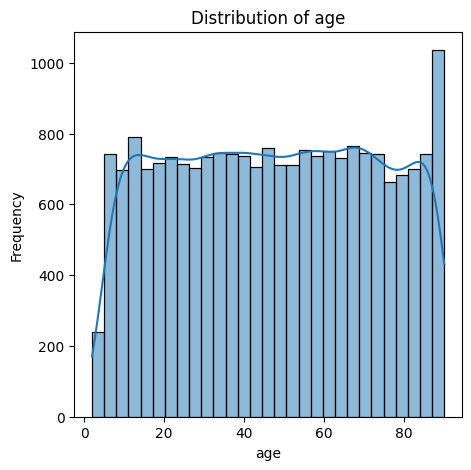

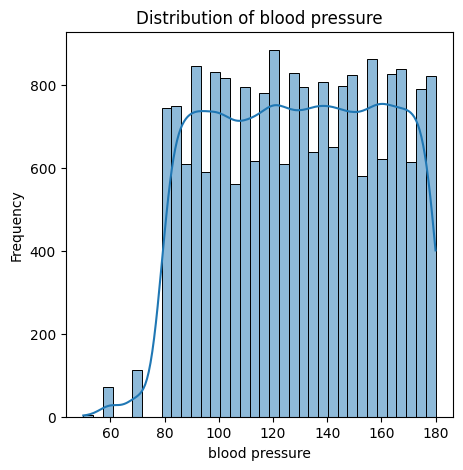

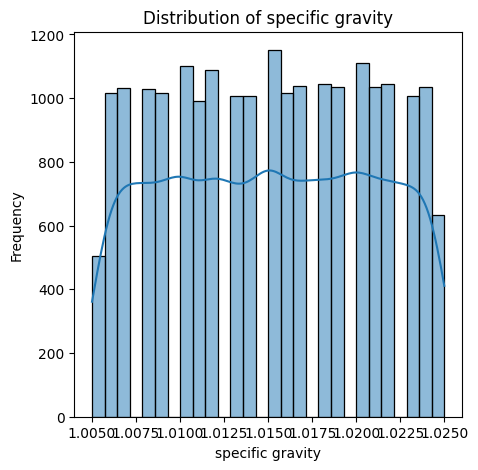

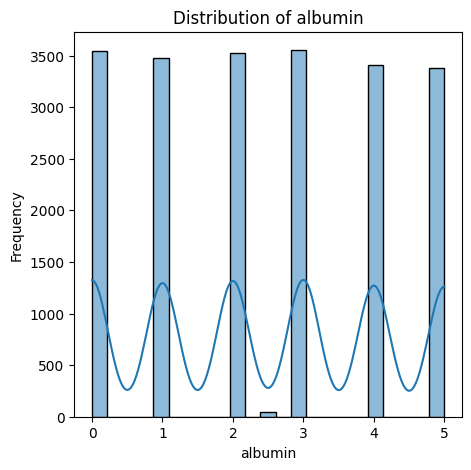

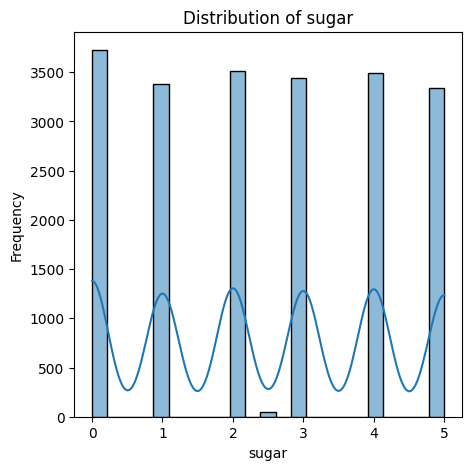

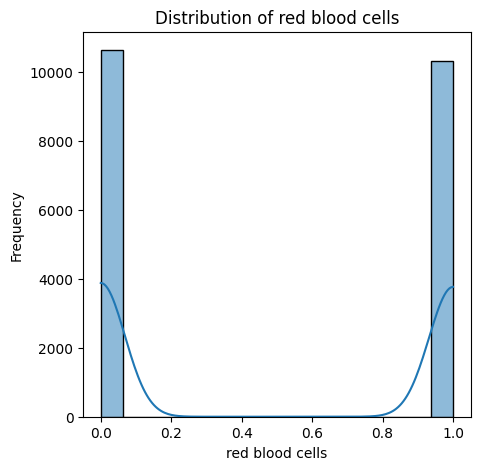

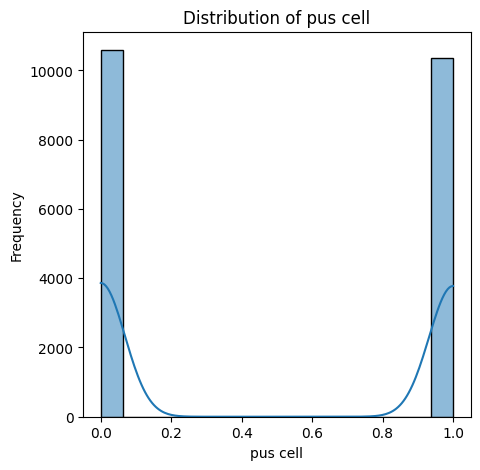

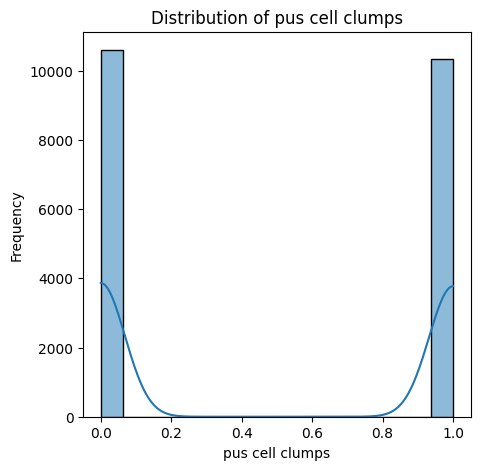

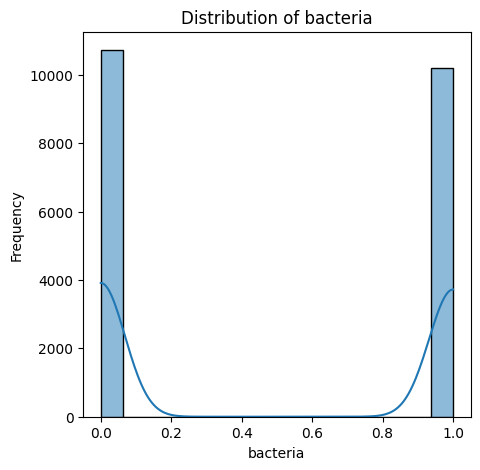

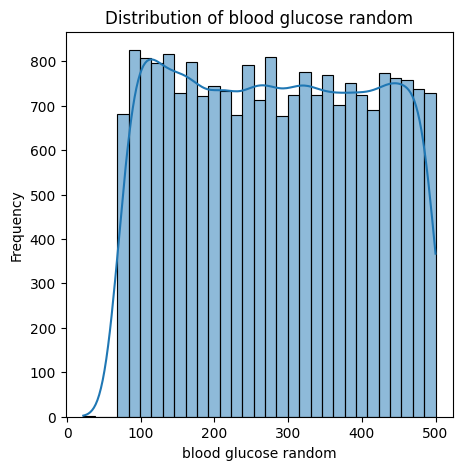

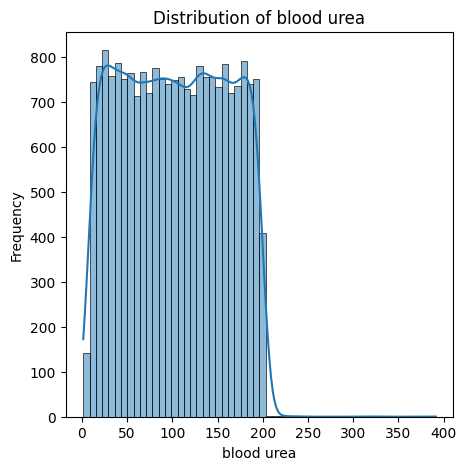

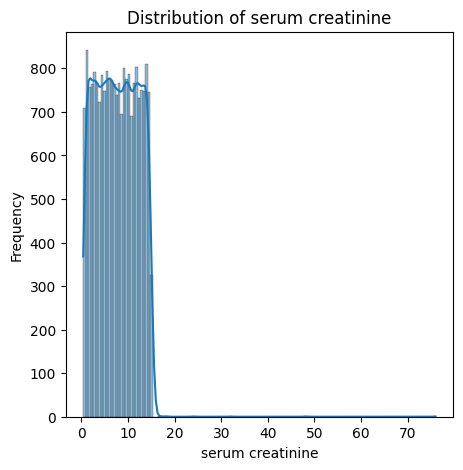

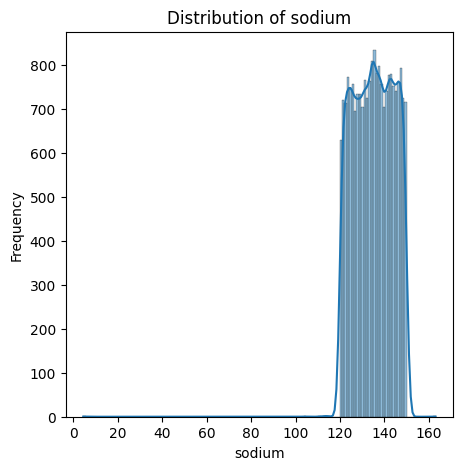

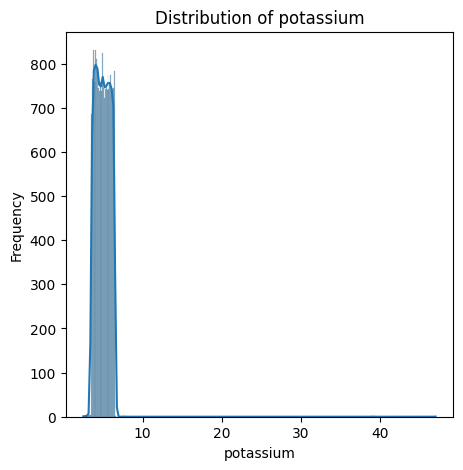

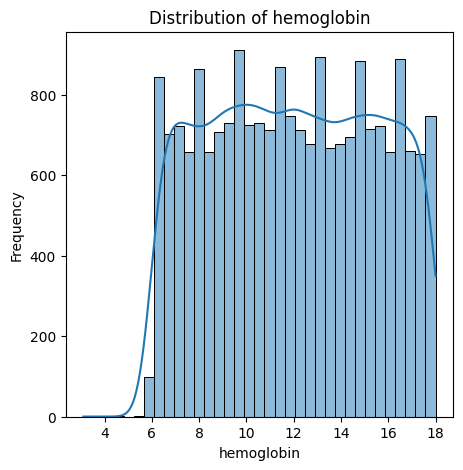

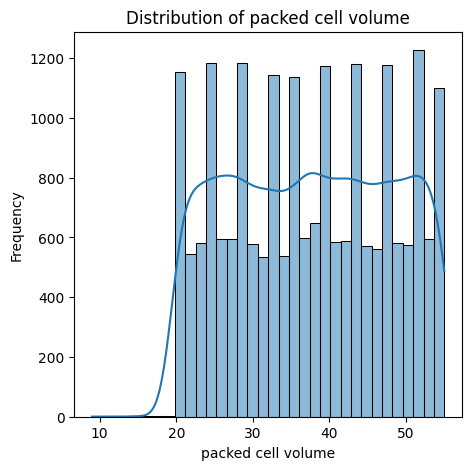

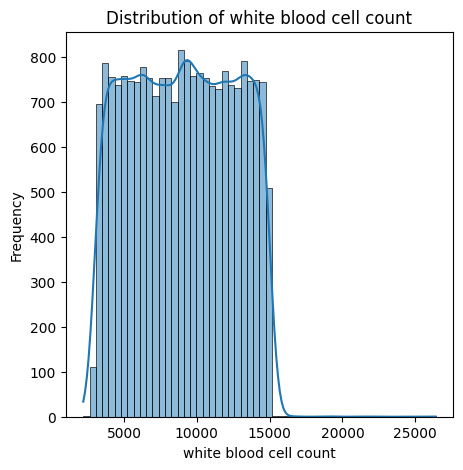

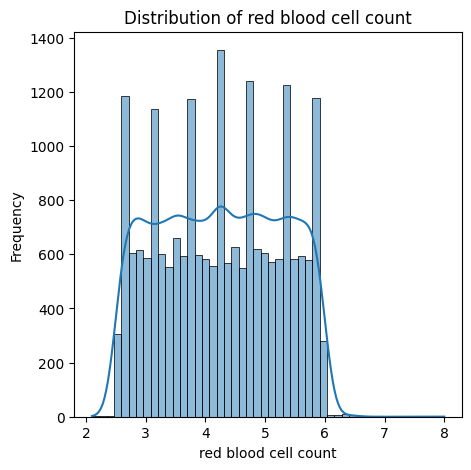

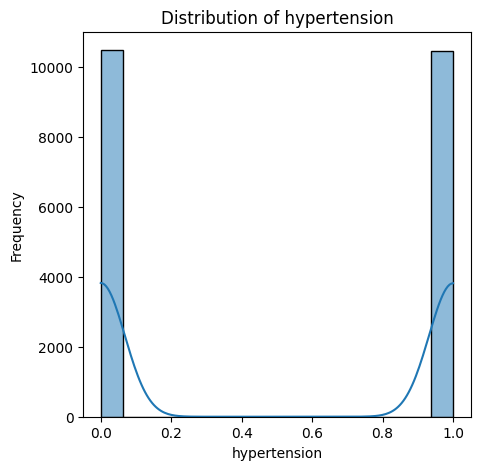

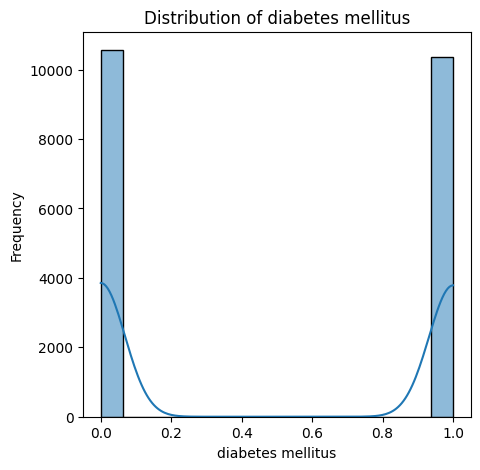

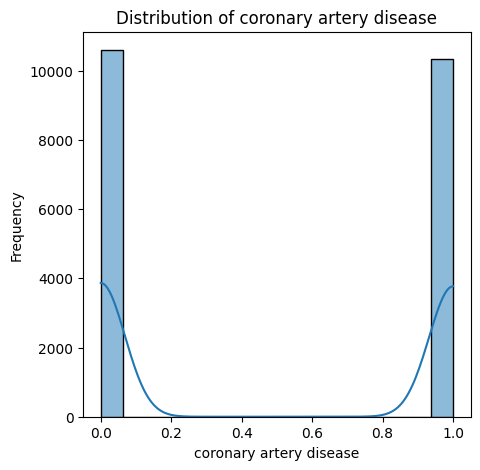

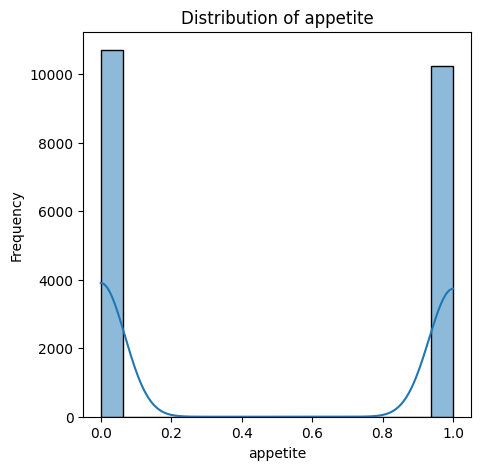

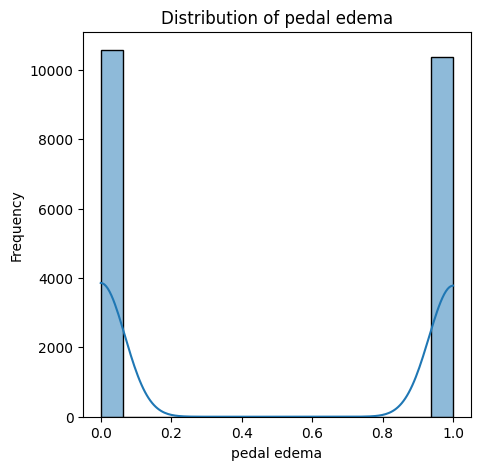

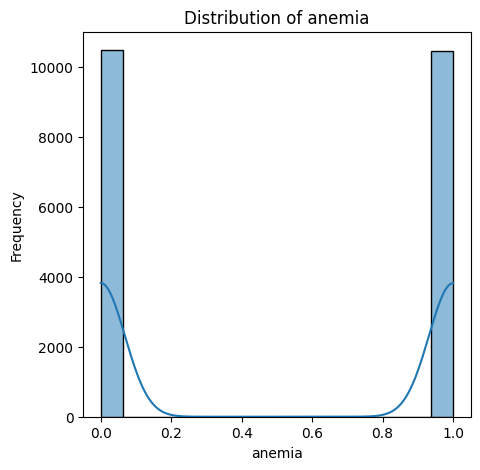

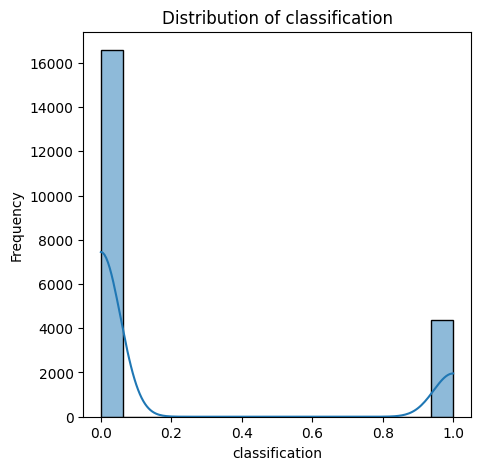

In [ ]:
# Distribution Plot - Histogram + KDE - For all Numeric Columns
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(5, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

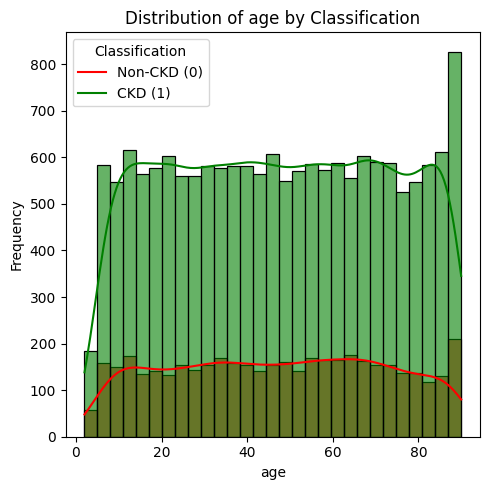

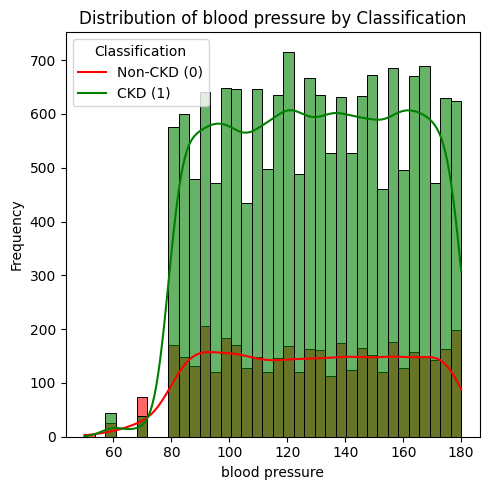

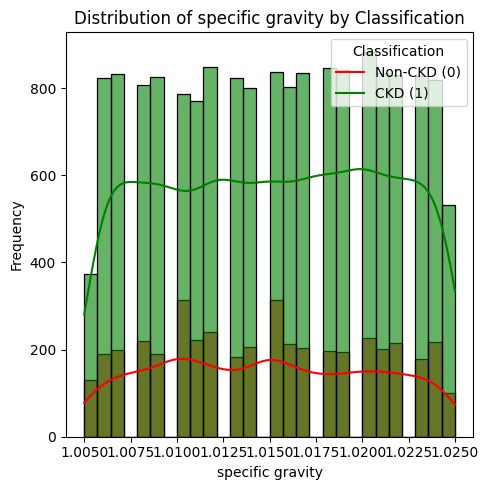

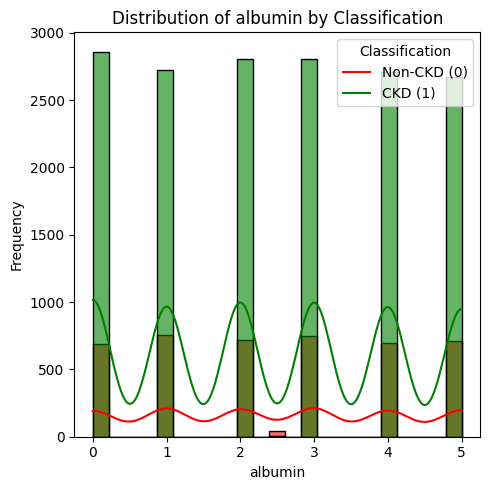

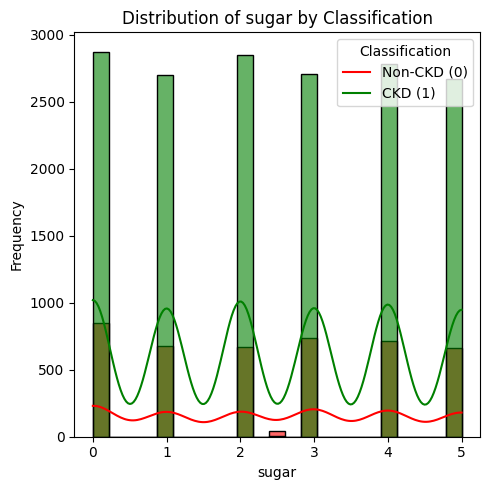

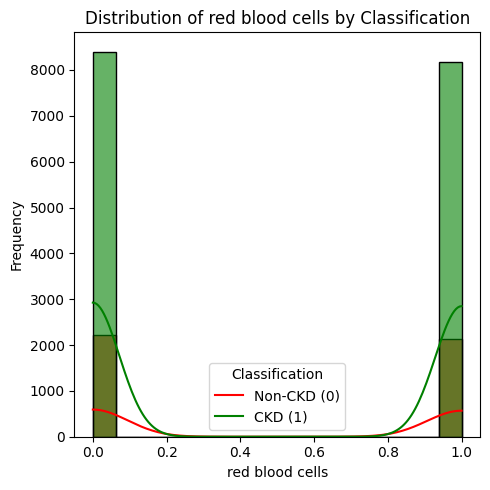

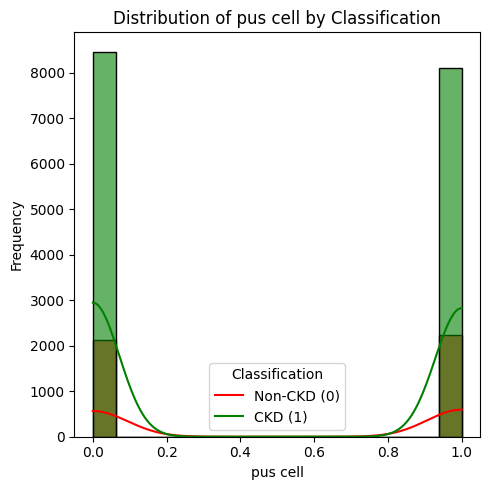

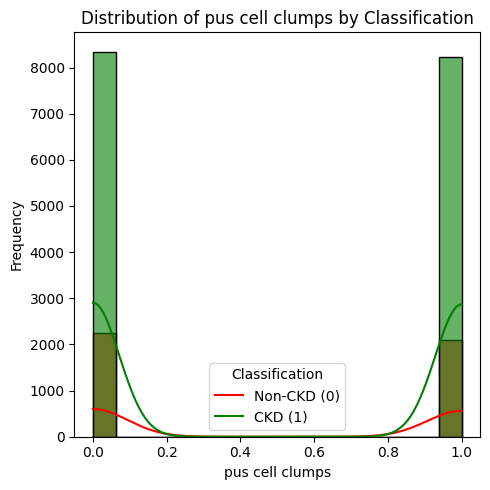

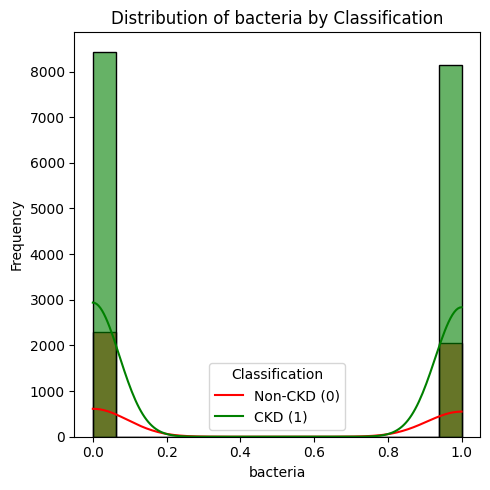

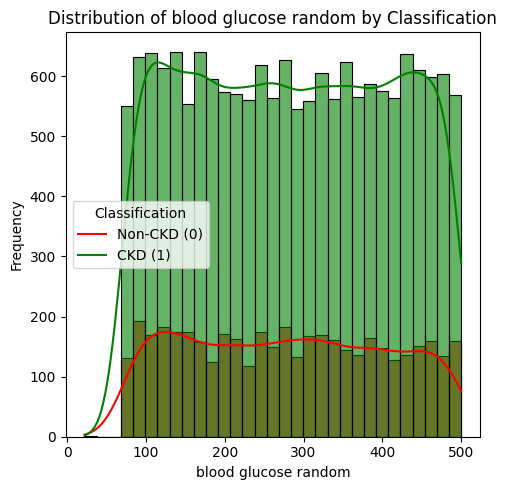

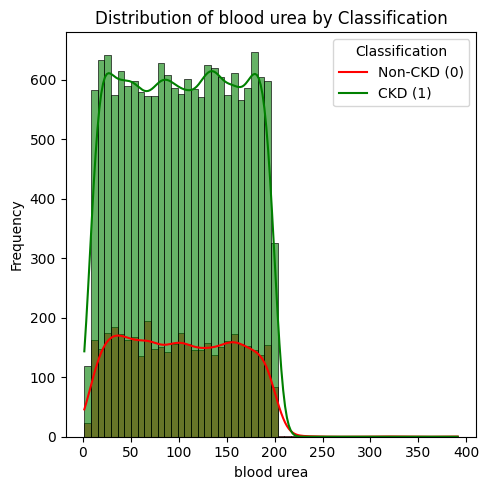

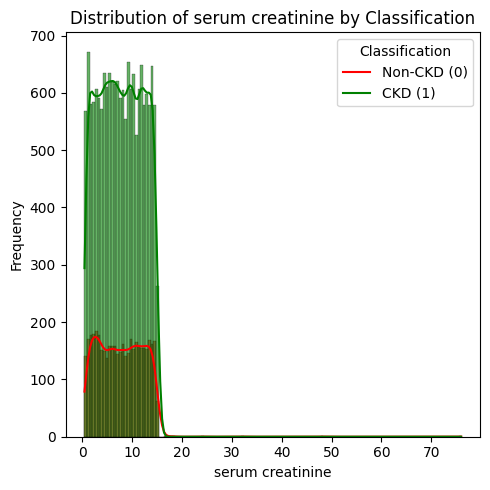

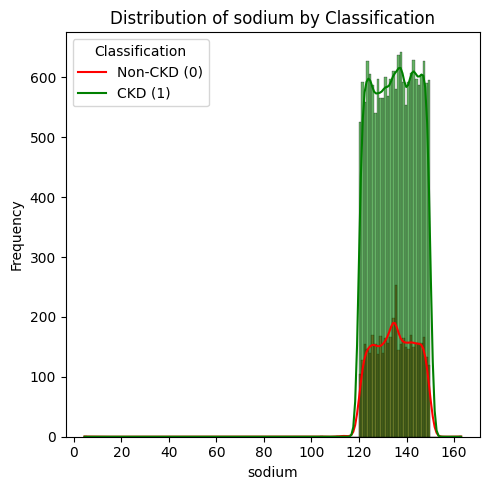

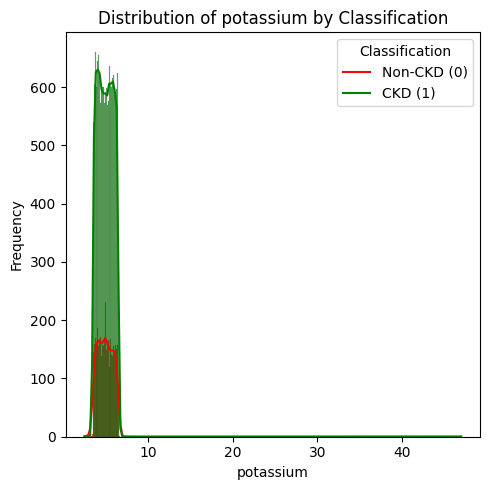

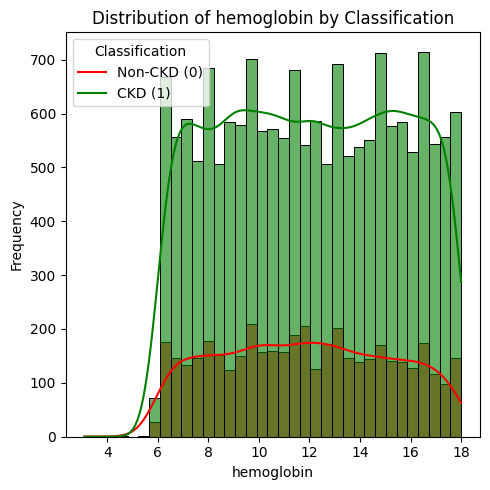

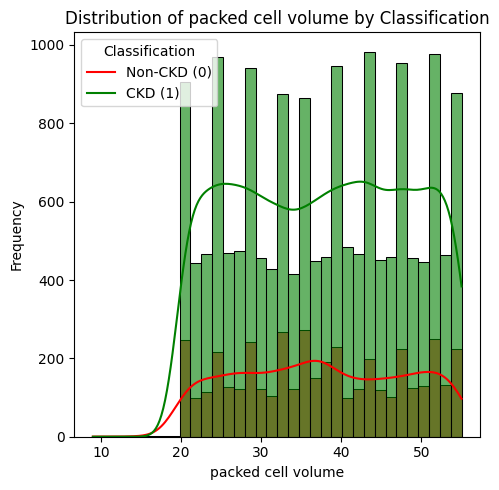

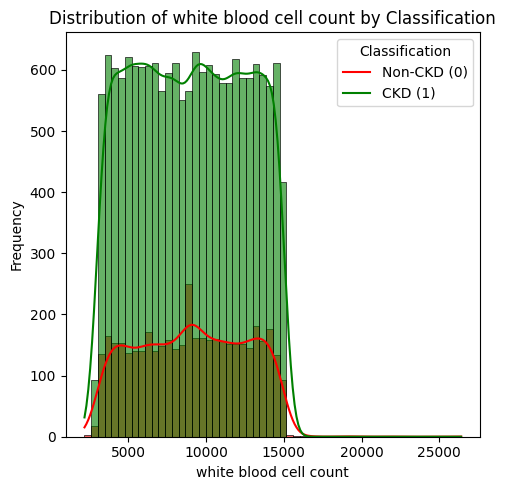

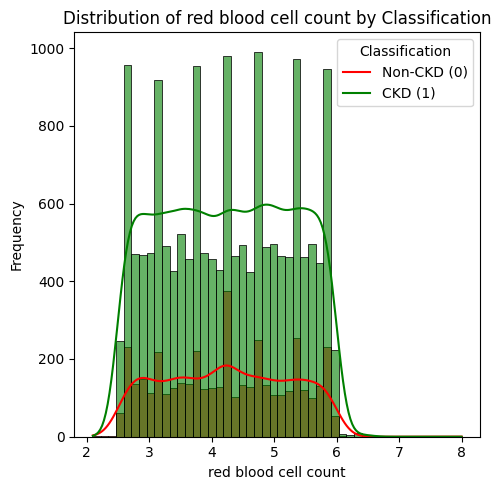

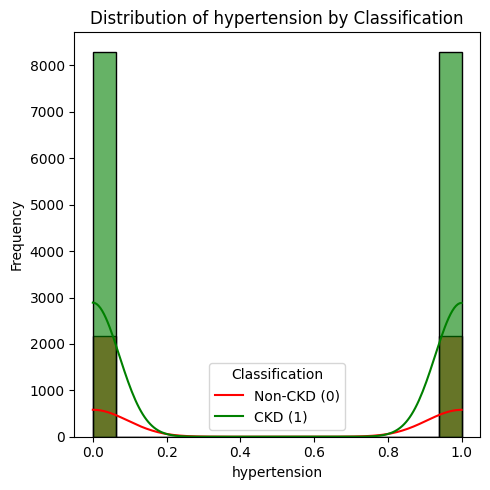

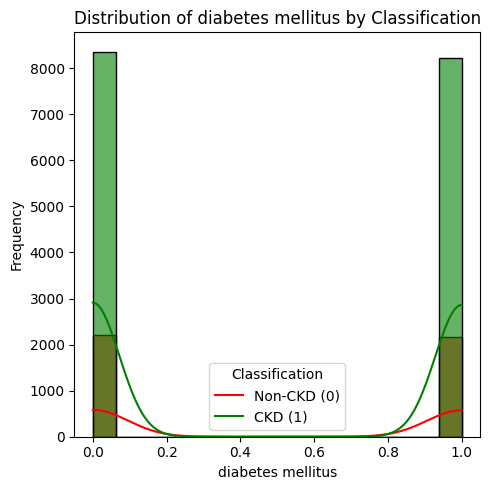

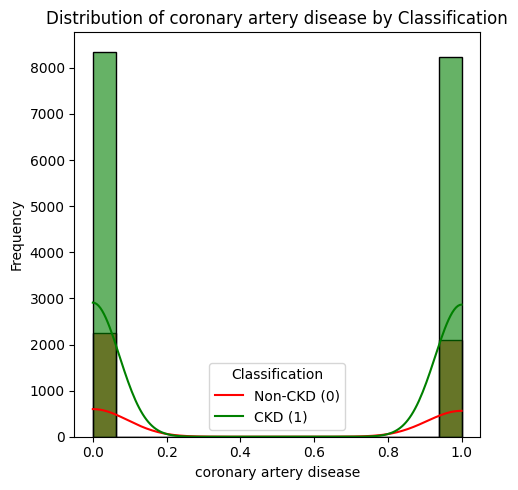

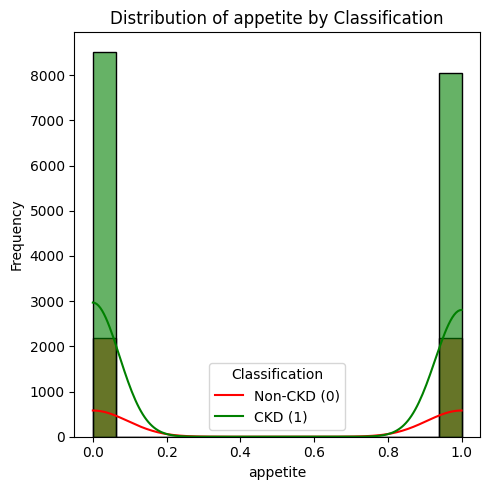

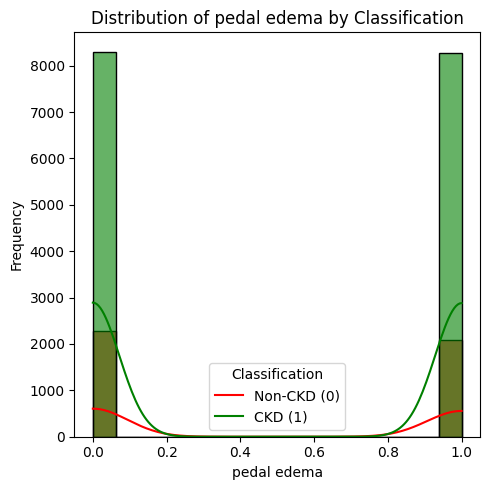

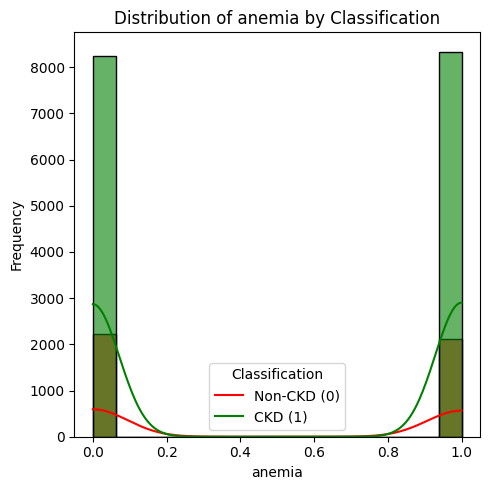

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns except the target
numeric_cols = df.select_dtypes(include=np.number).columns.drop('classification')

# Loop through each numeric column
for col in numeric_cols:
    plt.figure(figsize=(5, 5))
    sns.histplot(
        data=df,
        x=col,
        hue='classification',
        kde=True,
        palette={0: 'green', 1: 'red'},
        alpha=0.6
    )
    plt.title(f'Distribution of {col} by Classification')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend(title='Classification', labels=['Non-CKD (0)', 'CKD (1)'])
    plt.tight_layout()
    plt.show()


DataFrame columns: ['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar', 'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria', 'blood glucose random', 'blood urea', 'serum creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count', 'hypertension', 'diabetes mellitus', 'coronary artery disease', 'appetite', 'pedal edema', 'anemia', 'classification']


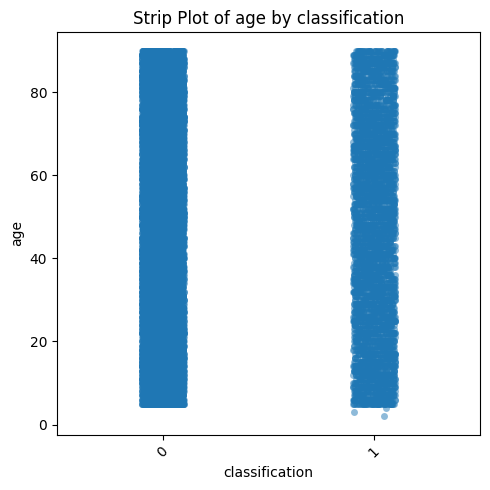

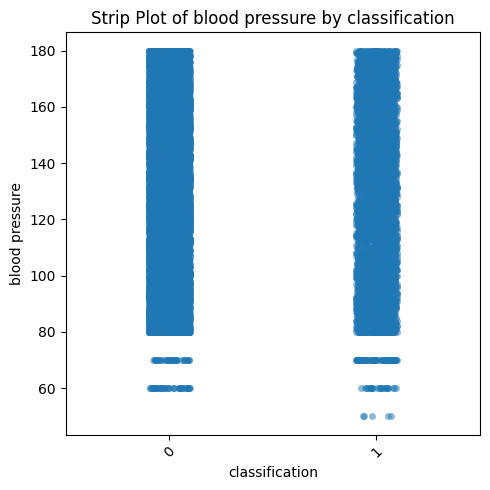

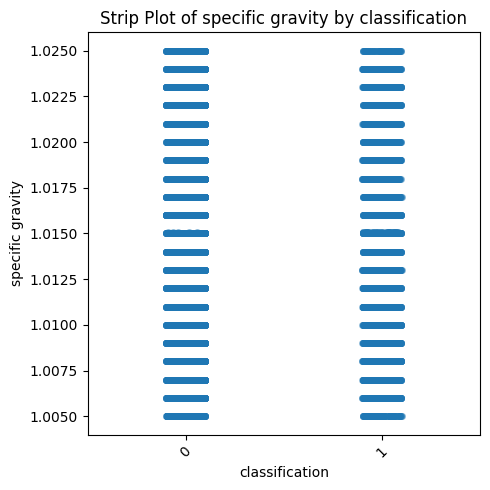

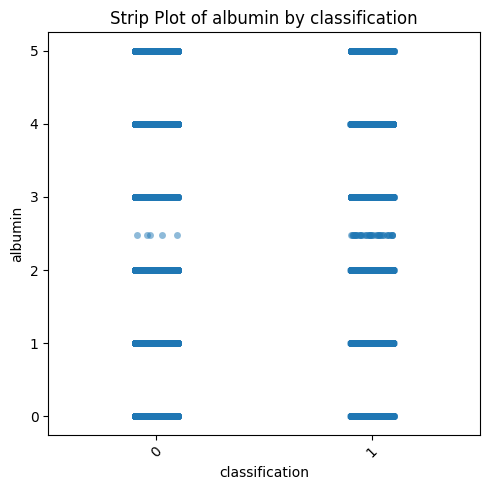

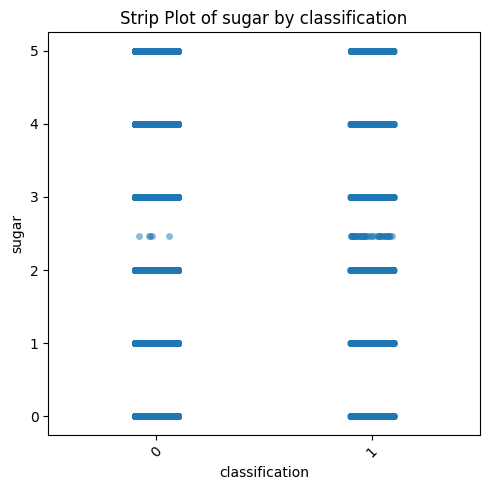

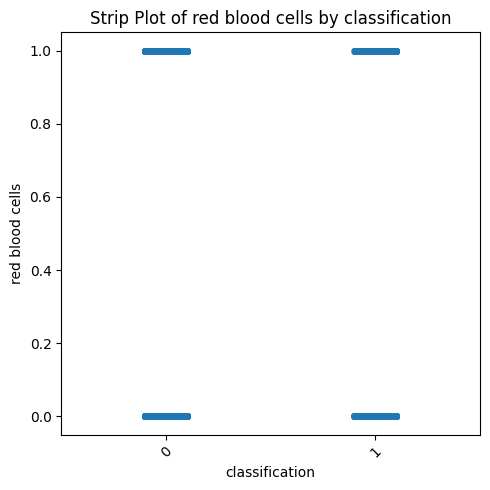

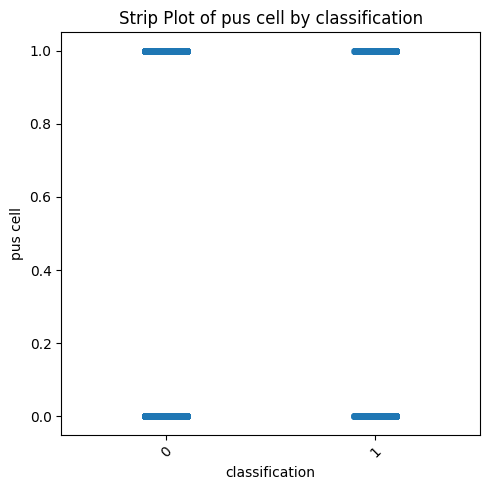

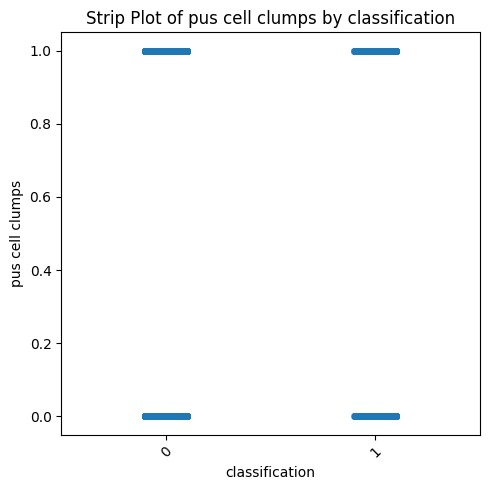

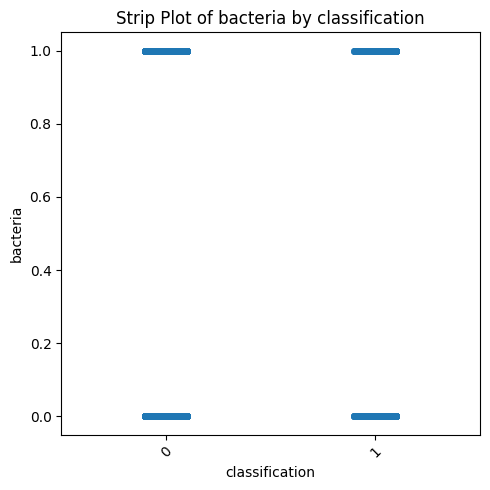

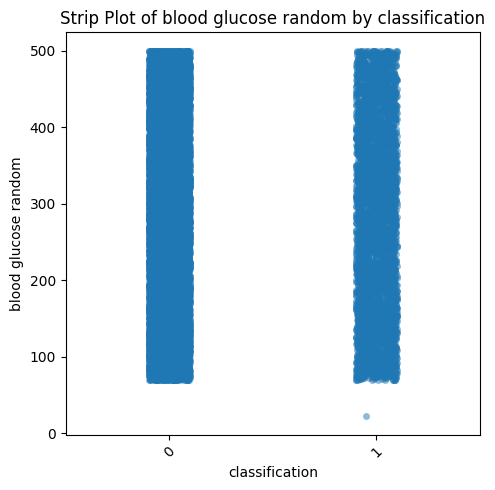

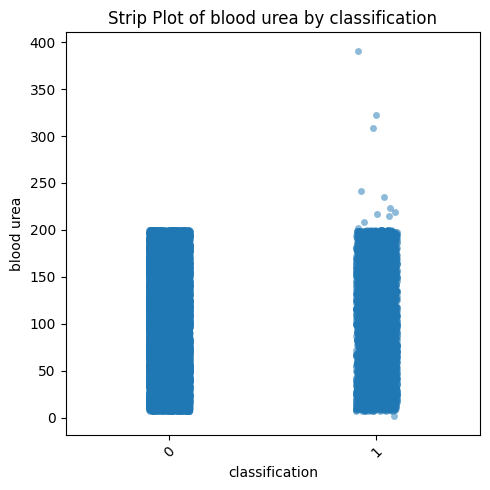

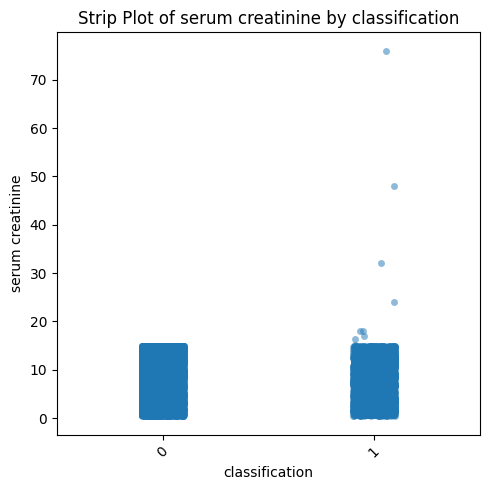

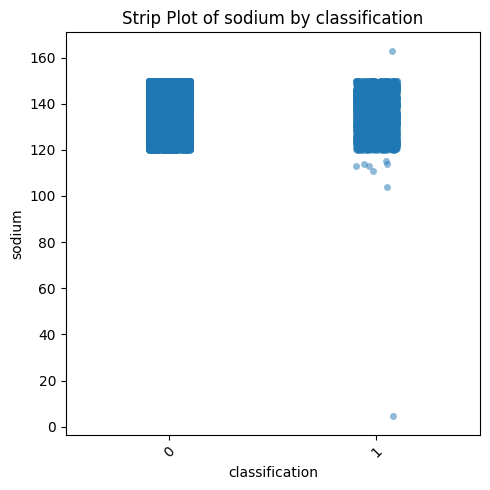

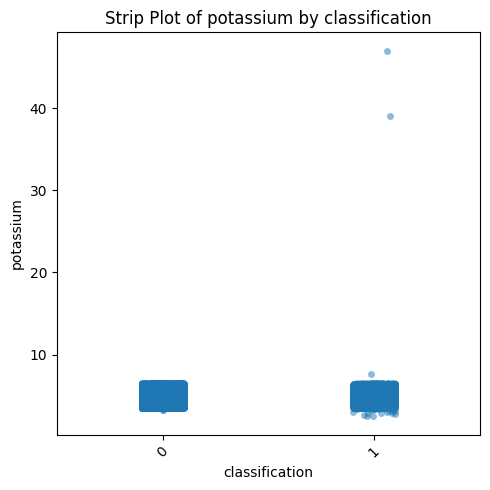

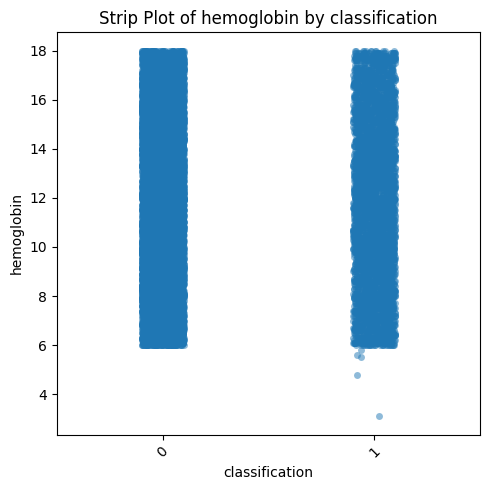

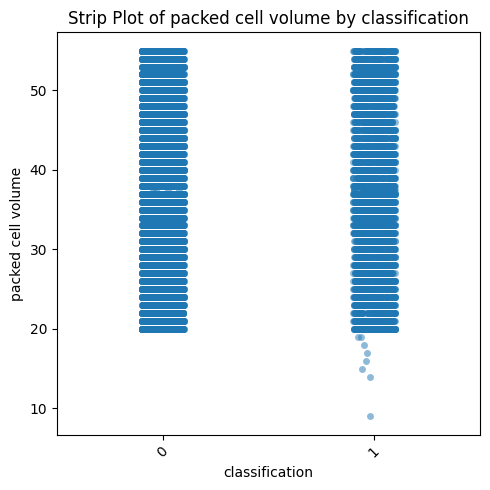

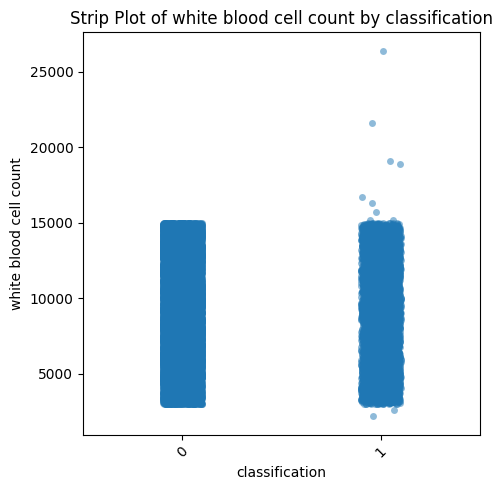

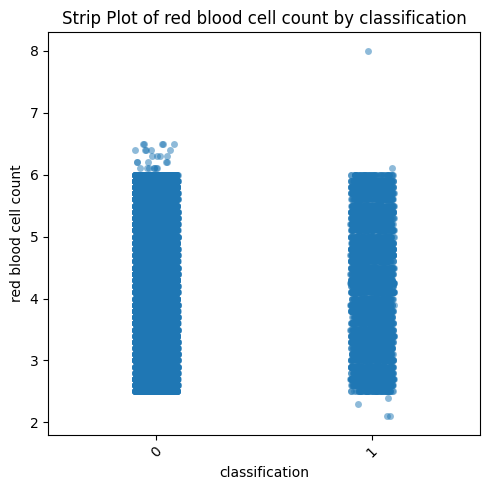

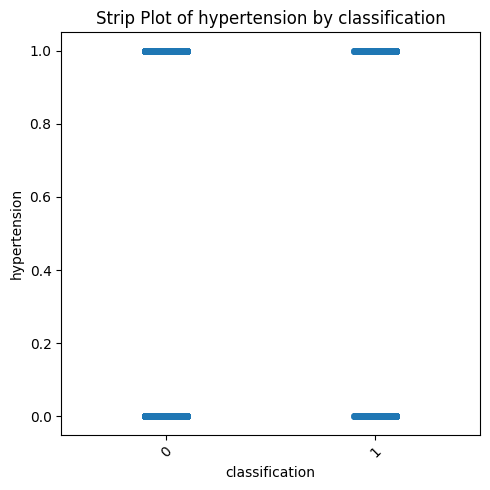

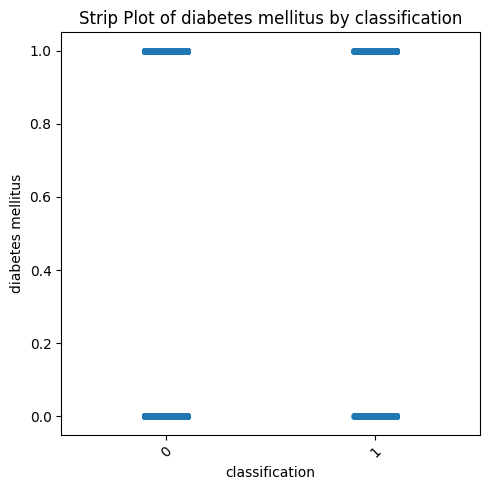

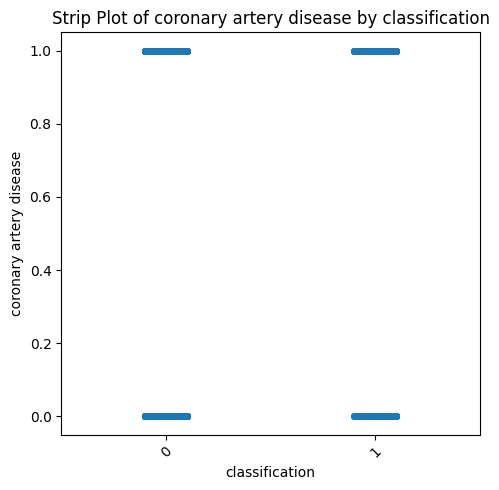

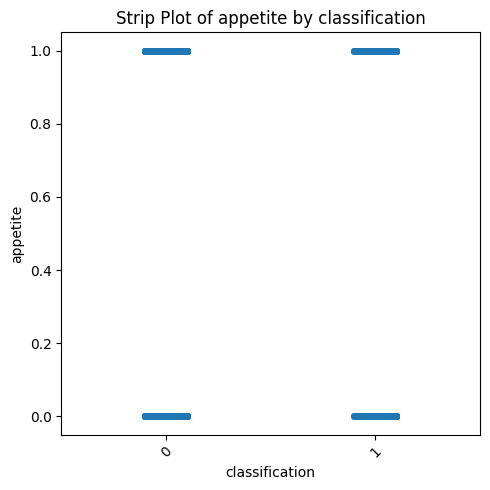

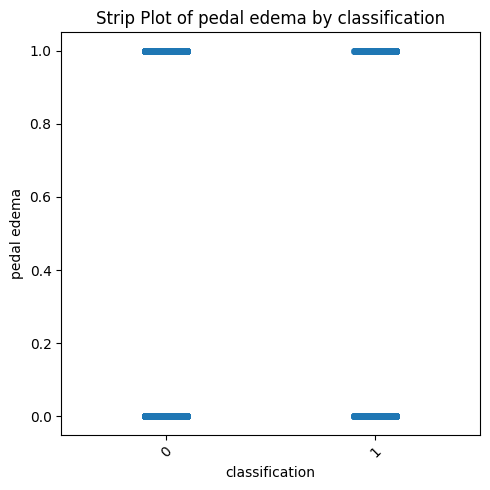

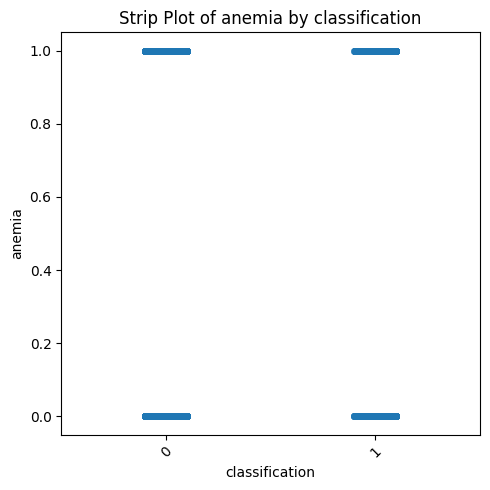

In [ ]:
# Swarm Plot - Categorical Vs Numeric Columns

categorical_cols = ['classification']
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude the target variable 'classification' from numeric columns for these plots
if 'classification' in numeric_cols:
    numeric_cols.remove('classification')

# Select a few numeric columns for plotting to avoid too many plots
numeric_cols_subset = numeric_cols # You can change this list

print("DataFrame columns:", df.columns.tolist())

for cat_col in categorical_cols:
    if cat_col in df.columns:
        for num_col in numeric_cols_subset:
            if num_col in df.columns:
                plt.figure(figsize=(5, 5))
                sns.stripplot(x=cat_col, y=num_col, data=df, jitter=True, alpha=0.5) # Using stripplot as an alternative
                plt.title(f'Strip Plot of {num_col} by {cat_col}')
                plt.xlabel(cat_col)
                plt.ylabel(num_col)
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()
            else:
                print(f"Warning: Numeric column '{num_col}' not found in DataFrame.")
    else:
        print(f"Warning: Categorical column '{cat_col}' not found in DataFrame.")

In [ ]:
import pandas as pd
from scipy import stats

# Assuming your dataset is named df and has columns:
# 'blood pressure' and 'classification'

# Separate groups
group_0 = df[df['classification'] == 0]['blood pressure']
group_1 = df[df['classification'] == 1]['blood pressure']

# -----------------------------
# ✅ 1. Parametric Test - ANOVA
# -----------------------------
anova_stat, anova_p = stats.f_oneway(group_0, group_1)
print("ANOVA Test (Parametric)")
print(f"F-statistic: {anova_stat:.4f}, p-value: {anova_p:.4f}")
if anova_p < 0.05:
    print("→ Significant difference in mean blood pressure between CKD and non-CKD.")
else:
    print("→ No significant difference (means are similar).")

# -----------------------------
# 🧩 2. Non-Parametric Test - Kruskal-Wallis
# -----------------------------
kruskal_stat, kruskal_p = stats.kruskal(group_0, group_1)
print("\nKruskal-Wallis Test (Non-Parametric)")
print(f"H-statistic: {kruskal_stat:.4f}, p-value: {kruskal_p:.4f}")
if kruskal_p < 0.05:
    print("→ Significant difference in blood pressure distribution between CKD and non-CKD.")
else:
    print("→ No significant difference in distribution.")


ANOVA Test (Parametric)
F-statistic: 11.0379, p-value: 0.0009
→ Significant difference in mean blood pressure between CKD and non-CKD.

Kruskal-Wallis Test (Non-Parametric)
H-statistic: 8.3336, p-value: 0.0039
→ Significant difference in blood pressure distribution between CKD and non-CKD.


In [ ]:
# Shapiro-Wilk test for normality
shapiro_0 = stats.shapiro(group_0)
shapiro_1 = stats.shapiro(group_1)
print(f"Group 0 normality p-value: {shapiro_0.pvalue:.4f}")
print(f"Group 1 normality p-value: {shapiro_1.pvalue:.4f}")


Group 0 normality p-value: 0.0000
Group 1 normality p-value: 0.0000


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16582.
  res = hypotest_fun_out(*samples, **kwds)


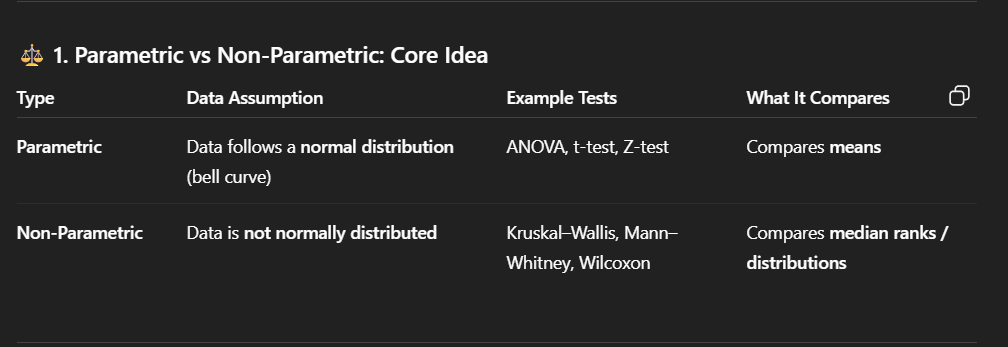

| **Aspect**            | **Parametric Tests**                                                  | **Non-Parametric Tests**                                                     |
| --------------------- | --------------------------------------------------------------------- | ---------------------------------------------------------------------------- |
| **Assumptions**       | Assume the data follows a **specific distribution** (usually normal). | Do **not assume** any specific data distribution.                            |
| **Type of Data**      | Work best with **interval or ratio** data (continuous, numeric).      | Work with **ordinal or non-normal** data (ranked, skewed, or small samples). |
| **Measures Used**     | Use **means** and **standard deviations**.                            | Use **medians** and **rankings**.                                            |
| **Statistical Power** | More powerful **if assumptions are met**.                             | Less powerful but **more robust** when assumptions are violated.             |
| **When to Use**       | When data is **normally distributed** and variances are **equal**.    | When data is **skewed**, **small**, or **non-normal**.                       |


| **Scenario**                            | **Parametric Test**                  | **Non-Parametric Equivalent**                            |
| --------------------------------------- | ------------------------------------ | -------------------------------------------------------- |
| Comparing means of two groups           | **Independent t-test**               | **Mann–Whitney U Test**                                  |
| Comparing means of three or more groups | **ANOVA**                            | **Kruskal–Wallis H-test**                                |
| Comparing paired samples                | **Paired t-test**                    | **Wilcoxon Signed-Rank Test**                            |
| Testing correlation                     | **Pearson correlation**              | **Spearman rank correlation**                            |
| Testing normality                       | **Z / F / T Tests assume normality** | **Shapiro–Wilk, Kolmogorov–Smirnov** check for normality |


Interpretation:

p > 0.05 → data is normal → use parametric test

p < 0.05 → data not normal → use non-parametric test

In [ ]:
from scipy import stats

# Example: check normality for blood pressure
stat, p = stats.shapiro(df['blood pressure'])

print(f"Shapiro-Wilk Test → Statistic: {stat:.4f}, p-value: {p:.4f}")
if p > 0.05:
    print("✅ Data is normally distributed (Parametric).")
else:
    print("❌ Data is NOT normally distributed (Non-Parametric).")


Shapiro-Wilk Test → Statistic: 0.9617, p-value: 0.0000
❌ Data is NOT normally distributed (Non-Parametric).


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20938.
  res = hypotest_fun_out(*samples, **kwds)


If the plot looks bell-shaped (symmetric) → parametric.

If it’s skewed or has outliers → non-parametric.

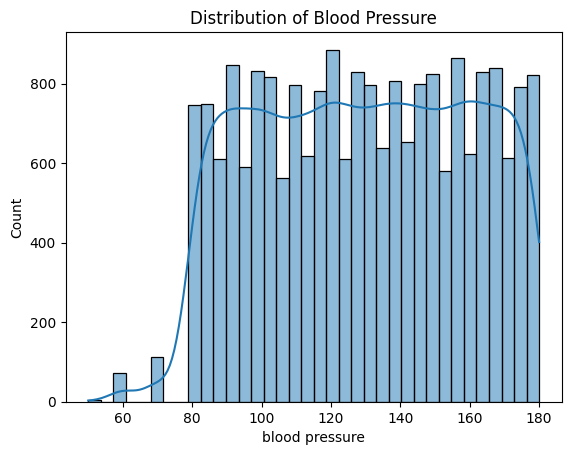

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['blood pressure'], kde=True)
plt.title("Distribution of Blood Pressure")
plt.show()


Explanation:

Shapiro–Wilk Test checks whether data comes from a normal distribution.

Null hypothesis (H₀): Data is normally distributed.

If p > 0.05 → Fail to reject H₀ → Parametric

If p ≤ 0.05 → Reject H₀ → Non-parametric

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro

# Example: load your dataset
# df = pd.read_csv("your_dataset.csv")

# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

parametric = []
non_parametric = []

# Check normality for each numeric column
for col in numeric_cols:
    # Drop NaN values before performing Shapiro-Wilk test
    stat, p = shapiro(df[col].dropna())
    if p > 0.05:
        parametric.append(col)
    else:
        non_parametric.append(col)

print("✅ Parametric (Normally Distributed) Columns:")
print(parametric)
print("\n⚠️ Non-Parametric (Not Normally Distributed) Columns:")
print(non_parametric)

✅ Parametric (Normally Distributed) Columns:
[]

⚠️ Non-Parametric (Not Normally Distributed) Columns:
['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar', 'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria', 'blood glucose random', 'blood urea', 'serum creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count', 'hypertension', 'diabetes mellitus', 'coronary artery disease', 'appetite', 'pedal edema', 'anemia', 'classification']


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20938.
  res = hypotest_fun_out(*samples, **kwds)


| Feature          | Parametric                         | Non-Parametric                |
| ---------------- | ---------------------------------- | ----------------------------- |
| Distribution     | Normal                             | Non-normal or unknown         |
| Data Type        | Interval/Ratio                     | Ordinal/Nominal               |
| Test Example     | t-test, ANOVA                      | Mann-Whitney, Kruskal-Wallis  |
| Central Tendency | Mean                               | Median or Rank                |
| Sensitivity      | More powerful (if assumptions met) | More robust (less assumption) |


# Non parametric Tests

# Kruskal-Wallis H-test

In [ ]:
# Non-parametric Tests
# Kruskal-Wallis H-test

from scipy.stats import kruskal

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude the target variable 'classification' from numeric columns for the test
if 'classification' in numeric_cols:
    numeric_cols.remove('classification')

# Separate data by classification groups
group_0 = df[df['classification'] == 0]
group_1 = df[df['classification'] == 1]


print("Kruskal-Wallis H-test results:")
for col in numeric_cols:
    if col in group_0.columns and col in group_1.columns:
        # Drop NaN values from the columns for the test
        data_group_0 = group_0[col].dropna()
        data_group_1 = group_1[col].dropna()

        if len(data_group_0) > 0 and len(data_group_1) > 0:
            h_statistic, p_value = kruskal(data_group_0, data_group_1)
            print(f"Column: {col}, H-statistic: {h_statistic:.4f}, P-value: {p_value:.4f}")
        else:
            print(f"Not enough data in both groups for column: {col}")
    else:
        print(f"Column {col} not found in both classification groups.")

Kruskal-Wallis H-test results:
Column: age, H-statistic: 1.3345, P-value: 0.2480
Column: blood pressure, H-statistic: 8.3336, P-value: 0.0039
Column: specific gravity, H-statistic: 11.4625, P-value: 0.0007
Column: albumin, H-statistic: 0.7878, P-value: 0.3748
Column: sugar, H-statistic: 4.0904, P-value: 0.0431
Column: red blood cells, H-statistic: 0.2128, P-value: 0.6446
Column: pus cell, H-statistic: 7.7510, P-value: 0.0054
Column: pus cell clumps, H-statistic: 2.6899, P-value: 0.1010
Column: bacteria, H-statistic: 4.3870, P-value: 0.0362
Column: blood glucose random, H-statistic: 4.2238, P-value: 0.0399
Column: blood urea, H-statistic: 2.4424, P-value: 0.1181
Column: serum creatinine, H-statistic: 0.1755, P-value: 0.6753
Column: sodium, H-statistic: 0.0786, P-value: 0.7792
Column: potassium, H-statistic: 2.6841, P-value: 0.1014
Column: hemoglobin, H-statistic: 8.7519, P-value: 0.0031
Column: packed cell volume, H-statistic: 0.4333, P-value: 0.5104
Column: white blood cell count, H-st

Interpretation rule:

If p-value < 0.05, the difference between CKD and non-CKD groups is statistically significant.

If p-value ≥ 0.05, no significant difference is detected.

| Feature                     | H-statistic | p-value | Significance | Insight                                                                            |
| --------------------------- | ----------- | ------- | ------------ | ---------------------------------------------------------------------------------- |
| **age**                     | 1.33        | 0.248   | ❌ No         | Age distribution is similar between CKD and non-CKD.                               |
| **blood pressure**          | 8.33        | 0.0039  | ✅ Yes        | CKD patients have significantly different blood pressure levels (likely higher).   |
| **specific gravity**        | 11.46       | 0.0007  | ✅ Yes        | Urine concentration differs; lower specific gravity in CKD is typical.             |
| **albumin**                 | 0.78        | 0.3748  | ❌ No         | Albumin levels not significantly different.                                        |
| **sugar**                   | 4.09        | 0.0431  | ✅ Yes        | CKD patients tend to have higher urine sugar.                                      |
| **red blood cells**         | 0.21        | 0.6446  | ❌ No         | RBC distribution is similar.                                                       |
| **pus cell**                | 7.75        | 0.0054  | ✅ Yes        | Pus cell count differs — CKD may associate with infections.                        |
| **pus cell clumps**         | 2.68        | 0.101   | ❌ No         | No significant difference.                                                         |
| **bacteria**                | 4.38        | 0.0362  | ✅ Yes        | More bacteria present in CKD group — sign of infection risk.                       |
| **blood glucose random**    | 4.22        | 0.0399  | ✅ Yes        | CKD group has higher blood glucose (common comorbidity).                           |
| **blood urea**              | 2.44        | 0.118   | ❌ No         | Difference not statistically significant.                                          |
| **serum creatinine**        | 0.18        | 0.675   | ❌ No         | Surprisingly not significant — may be due to scaling or data imbalance.            |
| **sodium**                  | 0.08        | 0.779   | ❌ No         | Sodium levels similar.                                                             |
| **potassium**               | 2.68        | 0.101   | ❌ No         | Potassium levels similar.                                                          |
| **hemoglobin**              | 8.75        | 0.0031  | ✅ Yes        | CKD patients have significantly lower hemoglobin (anemia tendency).                |
| **packed cell volume**      | 0.43        | 0.510   | ❌ No         | No significant difference.                                                         |
| **white blood cell count**  | 1.49        | 0.222   | ❌ No         | Similar WBC count across groups.                                                   |
| **red blood cell count**    | 0.90        | 0.343   | ❌ No         | Similar RBC count.                                                                 |
| **hypertension**            | 0.0006      | 0.981   | ❌ No         | Variable may already be binary and not significantly differing in this dataset.    |
| **diabetes mellitus**       | 0.0138      | 0.906   | ❌ No         | No significant difference (perhaps both groups include diabetic and non-diabetic). |
| **coronary artery disease** | 2.10        | 0.147   | ❌ No         | Similar between groups.                                                            |
| **appetite**                | 2.73        | 0.099   | ❌ No         | Slightly lower appetite in CKD but not statistically proven.                       |
| **pedal edema**             | 5.67        | 0.017   | ✅ Yes        | CKD patients show more edema (fluid retention).                                    |
| **anemia**                  | 3.20        | 0.073   | ⚠️ Nearly    | CKD patients likely more anemic, borderline significance.                          |


🔍 Key Insights

Most significant differences (p < 0.05) occur in:

Blood Pressure

Specific Gravity

Sugar

Pus Cell

Bacteria

Blood Glucose Random

Hemoglobin

Pedal Edema

👉 These variables are strong biomarkers for distinguishing CKD vs non-CKD.

Borderline case:

Anemia (p = 0.073) — indicates a trend, but not statistically strong.

No difference:

Age, sodium, potassium, serum creatinine, hypertension, diabetes, etc., are not significantly different in your dataset.

This could mean either the sample size is small, or both groups have overlapping distributions.

✅ Summary Conclusion

Your Kruskal-Wallis test reveals that:

There are statistically significant differences in several biological and clinical indicators (e.g., blood pressure, specific gravity, hemoglobin, etc.) between CKD and non-CKD patients.

These findings imply that those variables are important predictors and should be prioritized in machine learning models or diagnostic analysis for CKD detection.

**All top features of these matches with our reduced 12 features using RF_Selector**

#Mann-Whitney U Test

In [ ]:
# Non-parametric Tests
# Mann-Whitney U Test

from scipy.stats import mannwhitneyu

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude the target variable 'classification' from numeric columns for the test
if 'classification' in numeric_cols:
    numeric_cols.remove('classification')

# Separate data by classification groups
group_0 = df[df['classification'] == 0]
group_1 = df[df['classification'] == 1]

print("Mann-Whitney U Test results:")
for col in numeric_cols:
    if col in group_0.columns and col in group_1.columns:
        # Drop NaN values from the columns for the test
        data_group_0 = group_0[col].dropna()
        data_group_1 = group_1[col].dropna()

        if len(data_group_0) > 0 and len(data_group_1) > 0:
            u_statistic, p_value = mannwhitneyu(data_group_0, data_group_1)
            print(f"Column: {col}, U-statistic: {u_statistic:.4f}, P-value: {p_value:.4f}")
        else:
            print(f"Not enough data in both groups for column: {col}")
    else:
        print(f"Column {col} not found in both classification groups.")

Mann-Whitney U Test results:
Column: age, U-statistic: 36525687.5000, P-value: 0.2480
Column: blood pressure, U-statistic: 37140407.0000, P-value: 0.0039
Column: specific gravity, U-statistic: 37316128.0000, P-value: 0.0007
Column: albumin, U-statistic: 35804863.5000, P-value: 0.3748
Column: sugar, U-statistic: 36823601.5000, P-value: 0.0431
Column: red blood cells, U-statistic: 36257402.0000, P-value: 0.6446
Column: pus cell, U-statistic: 35259681.0000, P-value: 0.0054
Column: pus cell clumps, U-statistic: 36619809.0000, P-value: 0.1010
Column: bacteria, U-statistic: 36759364.0000, P-value: 0.0362
Column: blood glucose random, U-statistic: 36845225.0000, P-value: 0.0399
Column: blood urea, U-statistic: 36670422.5000, P-value: 0.1181
Column: serum creatinine, U-statistic: 36264325.5000, P-value: 0.6753
Column: sodium, U-statistic: 36215129.0000, P-value: 0.7792
Column: potassium, U-statistic: 36697230.0000, P-value: 0.1014
Column: hemoglobin, U-statistic: 37165827.5000, P-value: 0.0031

Decision rule:

If p-value < 0.05, there is a statistically significant difference between CKD and non-CKD groups for that variable.

If p-value ≥ 0.05, no significant difference is observed.

| Feature                     | U-statistic | p-value | Significance | Interpretation                                                                 |
| --------------------------- | ----------- | ------- | ------------ | ------------------------------------------------------------------------------ |
| **age**                     | 36525687.5  | 0.2480  | ❌ No         | CKD and non-CKD have similar age distributions.                                |
| **blood pressure**          | 37140407.0  | 0.0039  | ✅ Yes        | CKD patients have significantly higher or different blood pressure.            |
| **specific gravity**        | 37316128.0  | 0.0007  | ✅ Yes        | CKD patients have lower urine specific gravity (less concentrated urine).      |
| **albumin**                 | 35804863.5  | 0.3748  | ❌ No         | Albumin levels are not significantly different.                                |
| **sugar**                   | 36823601.5  | 0.0431  | ✅ Yes        | CKD patients tend to have higher urine sugar levels.                           |
| **red blood cells**         | 36257402.0  | 0.6446  | ❌ No         | No significant difference in RBCs between groups.                              |
| **pus cell**                | 35259681.0  | 0.0054  | ✅ Yes        | CKD patients show higher pus cell counts (possible infection indicator).       |
| **pus cell clumps**         | 36619809.0  | 0.1010  | ❌ No         | Slight difference, but not statistically significant.                          |
| **bacteria**                | 36759364.0  | 0.0362  | ✅ Yes        | CKD patients have more bacterial presence in urine.                            |
| **blood glucose random**    | 36845225.0  | 0.0399  | ✅ Yes        | CKD group tends to have higher random blood glucose levels.                    |
| **blood urea**              | 36670422.5  | 0.1181  | ❌ No         | Urea levels not significantly different (possibly overlapping ranges).         |
| **serum creatinine**        | 36264325.5  | 0.6753  | ❌ No         | No significant difference found (unexpected — could be data imbalance).        |
| **sodium**                  | 36215129.0  | 0.7792  | ❌ No         | Sodium levels similar between groups.                                          |
| **potassium**               | 36697230.0  | 0.1014  | ❌ No         | Potassium levels not significantly different.                                  |
| **hemoglobin**              | 37165827.5  | 0.0031  | ✅ Yes        | CKD patients have lower hemoglobin — anemia tendency.                          |
| **packed cell volume**      | 36349196.5  | 0.5104  | ❌ No         | No significant difference.                                                     |
| **white blood cell count**  | 35682288.5  | 0.2223  | ❌ No         | Similar between groups.                                                        |
| **red blood cell count**    | 36451935.0  | 0.3433  | ❌ No         | Similar between groups.                                                        |
| **hypertension**            | 36123045.0  | 0.9807  | ❌ No         | No significant difference in hypertension status (likely categorical overlap). |
| **diabetes mellitus**       | 36151651.0  | 0.9066  | ❌ No         | Both groups include diabetic and non-diabetic patients.                        |
| **coronary artery disease** | 36560930.0  | 0.1475  | ❌ No         | Similar prevalence between groups.                                             |
| **appetite**                | 35608122.0  | 0.0987  | ❌ No         | Slight difference but not statistically strong.                                |
| **pedal edema**             | 36847876.0  | 0.0172  | ✅ Yes        | CKD patients show significantly more pedal edema (fluid retention).            |
| **anemia**                  | 36665676.0  | 0.0736  | ⚠️ Nearly    | CKD group shows higher anemia, but borderline significance.                    |


🔍 Insights Summary
✅ Significant differences (p < 0.05)

The following features are statistically different between CKD and non-CKD:

Blood Pressure

Specific Gravity

Sugar

Pus Cell

Bacteria

Blood Glucose (Random)

Hemoglobin

Pedal Edema

These variables are biologically relevant to CKD:

Higher BP and blood glucose → common in CKD due to hypertension and diabetes.

Low specific gravity → impaired kidney concentration ability.

Low hemoglobin and pedal edema → anemia and fluid retention from kidney dysfunction.

Presence of pus cells and bacteria → urinary tract infections, often linked with kidney disease.

⚠️ Borderline difference (0.05 < p < 0.1)

Anemia and Appetite — may still show clinical relevance, even if not statistically significant.

❌ No difference (p ≥ 0.05)

Age, sodium, potassium, urea, serum creatinine, hypertension, diabetes mellitus, etc.

Either the data overlap or the dataset doesn’t capture their typical variation well.

💡 Key Takeaway

The Mann–Whitney U test confirms that CKD and non-CKD patients differ significantly in several key health indicators, especially those related to kidney function, blood characteristics, and infection risk.

These significant features (with p < 0.05) are strong candidates for:

Predictor variables in a machine learning CKD classification model.

Biological interpretation of CKD’s impact on patient health.

# Wilcoxon Signed-Rank Test

## 🛑 **Important: Wilcoxon Signed-Rank Test is NOT appropriate for this dataset.**

The Wilcoxon Signed-Rank Test is used for comparing two **related paired samples**. This means you need two measurements from the *same* individual or matched pairs (e.g., a patient's blood pressure before and after treatment).

Your dataset, with its 'classification' column separating individuals into CKD and non-CKD groups, consists of **independent groups**.

Therefore, the Wilcoxon Signed-Rank Test is **not the correct test to use here**.

The **Mann-Whitney U test**, which we have already performed in cell `5rqbw2YzVWvW`, is the correct non-parametric test for comparing two independent groups. If your data were normally distributed, an independent samples t-test would be the appropriate parametric test.

| **Test Name**                 | **Used For**                                 | **Number of Groups** | **Data Type**                      | **Paired or Independent?** | **Equivalent Parametric Test** | **Example Use Case**                                |
| ----------------------------- | -------------------------------------------- | -------------------- | ---------------------------------- | -------------------------- | ------------------------------ | --------------------------------------------------- |
| **Mann–Whitney U Test**       | Compare **two independent groups**           | 2                    | Ordinal or Continuous (non-normal) | ✅ Independent              | Independent **t-test**         | Compare CKD vs Non-CKD blood pressure               |
| **Wilcoxon Signed-Rank Test** | Compare **two related/paired samples**       | 2                    | Ordinal or Continuous (non-normal) | ✅ Paired                   | Paired **t-test**              | Compare patient’s BP **before and after** treatment |
| **Kruskal–Wallis H Test**     | Compare **more than two independent groups** | ≥ 3                  | Ordinal or Continuous (non-normal) | ✅ Independent              | One-way **ANOVA**              | Compare kidney function across **3 age groups**     |


| Feature              | Kruskal–Wallis p-value | Mann–Whitney p-value | Common? |
| -------------------- | ---------------------- | -------------------- | ------- |
| blood pressure       | 0.0039                 | 0.0039               | ✅       |
| specific gravity     | 0.0007                 | 0.0007               | ✅       |
| sugar                | 0.0431                 | 0.0431               | ✅       |
| pus cell             | 0.0054                 | 0.0054               | ✅       |
| bacteria             | 0.0362                 | 0.0362               | ✅       |
| blood glucose random | 0.0399                 | 0.0399               | ✅       |
| hemoglobin           | 0.0031                 | 0.0031               | ✅       |
| pedal edema          | 0.0172                 | 0.0172               | ✅       |


In [ ]:
from scipy.stats import kruskal
import pandas as pd
import numpy as np

# Create new categorical group columns
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 60, 100], labels=['Young', 'Middle-aged', 'Senior'])
df['bp_group'] = pd.cut(df['blood pressure'], bins=[0, 119, 139, 200], labels=['Low', 'Normal', 'High'])
df['hb_group'] = pd.cut(df['hemoglobin'], bins=[0, 10, 13, 20], labels=['Low', 'Normal', 'High'])

# Define categorical group columns to analyze
group_columns = ['age_group', 'bp_group', 'hb_group']

print("Kruskal–Wallis H-Test across grouped features:\n")
for group_col in group_columns:
    # Drop rows with missing values in the group
    data = df.dropna(subset=[group_col, 'classification'])

    # Get CKD classification values per group
    groups = [data[data[group_col] == g]['classification'] for g in data[group_col].unique() if g is not np.nan]

    # Perform Kruskal–Wallis test
    h_stat, p_val = kruskal(*groups)
    print(f"{group_col}: H-statistic = {h_stat:.4f}, P-value = {p_val:.4f}")


Kruskal–Wallis H-Test across grouped features:

age_group: H-statistic = 3.4745, P-value = 0.1760
bp_group: H-statistic = 9.5730, P-value = 0.0083
hb_group: H-statistic = 23.7886, P-value = 0.0000


🧠 Analytical Insight

Hemoglobin (hb) shows the most significant variation across classes, indicating its strong potential as a predictive biomarker (e.g., in CKD risk or related conditions).

Blood Pressure (bp) also contributes meaningfully, reinforcing medical intuition that hypertension influences disease risk.

Age, while important in general health contexts, might not differ significantly among your current classification categories — perhaps due to a narrow sample distribution.

**blood** pressure → p = 0.0039 → significant
→ means CKD patients tend to have higher BP than non-CKD.


✅ It is a good discriminator,

💡 Takeaway

These tests help determine which factors actually matter —
whether they meaningfully separate one condition/group from another.

Once identified, such factors (like smoking, hemoglobin, sugar level, etc.) can be used as important predictive features in your ML model.


| Aspect                    | **Parametric Tests**     | **Non-Parametric Tests**           |
| ------------------------- | ------------------------ | ---------------------------------- |
| **Assumes normality**     | Yes ✅                    | No ❌                               |
| **Data type**             | Continuous               | Ordinal or skewed                  |
| **Measures**              | Mean differences         | Median or rank differences         |
| **Sensitive to outliers** | Yes                      | No                                 |
| **When to use**           | Data is clean and normal | Data is not normal or has outliers |


# Correlation Tests
Pearson Correlation

| Feature                         | **Pearson Correlation**                              | **Spearman Rank Correlation**                                           |
| ------------------------------- | ---------------------------------------------------- | ----------------------------------------------------------------------- |
| **Type**                        | *Parametric*                                         | *Non-parametric*                                                        |
| **Measures**                    | Linear relationship between two continuous variables | Monotonic relationship (increasing or decreasing) between two variables |
| **Data Requirement**            | Data must be **normally distributed** and continuous | Can handle **ordinal, skewed, or non-linear** data                      |
| **Computation Basis**           | Uses **actual values** of variables                  | Uses **ranked values** of variables                                     |
| **Outlier Sensitivity**         | Highly affected by outliers                          | Less affected by outliers                                               |
| **Correlation Coefficient (r)** | Between **–1 and +1**, same as Spearman              | Between **–1 and +1**, same as Pearson                                  |
| **Example Usage**               | Relationship between **height and weight**           | Relationship between **student rank and exam score**                    |


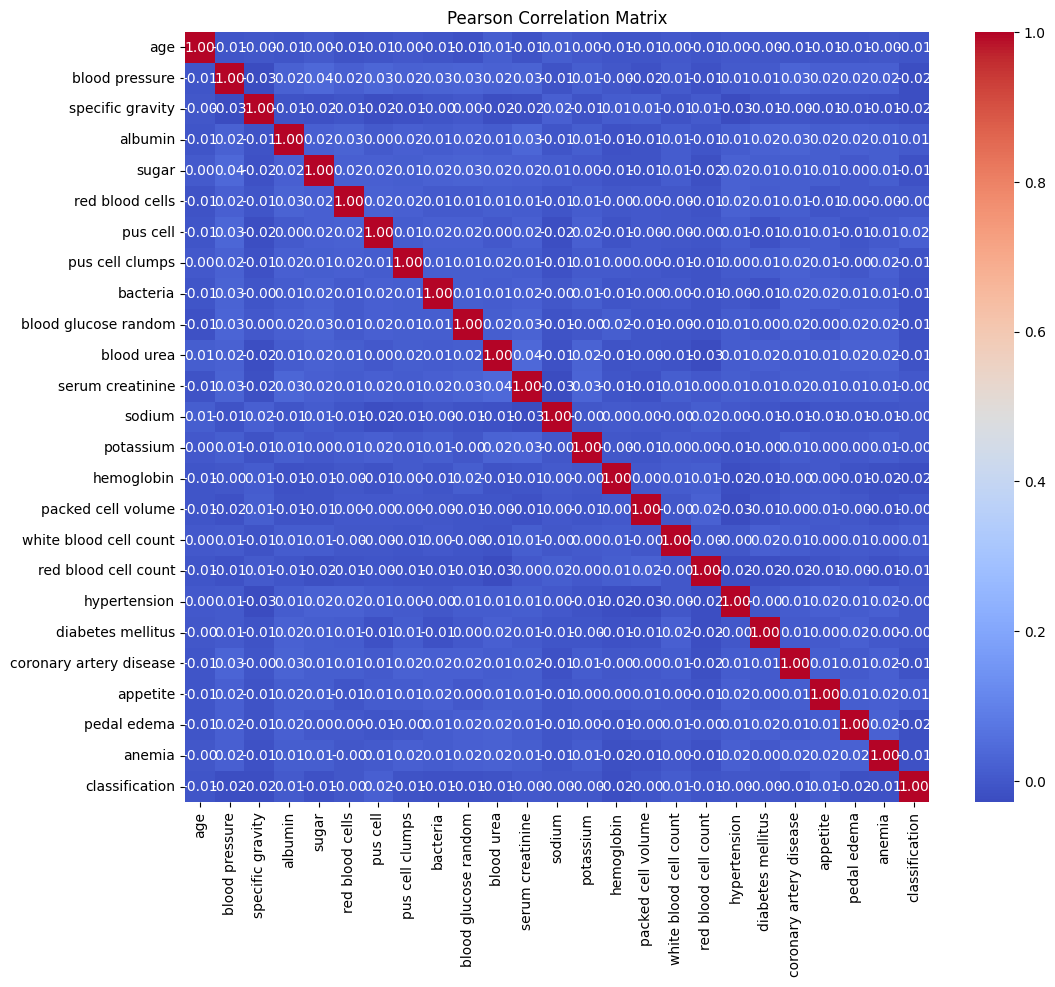

In [ ]:
# Correlation Tests
# Pearson Correlation

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=np.number)

# Calculate Pearson correlation matrix
correlation_matrix = numeric_df.corr(method='pearson')

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()

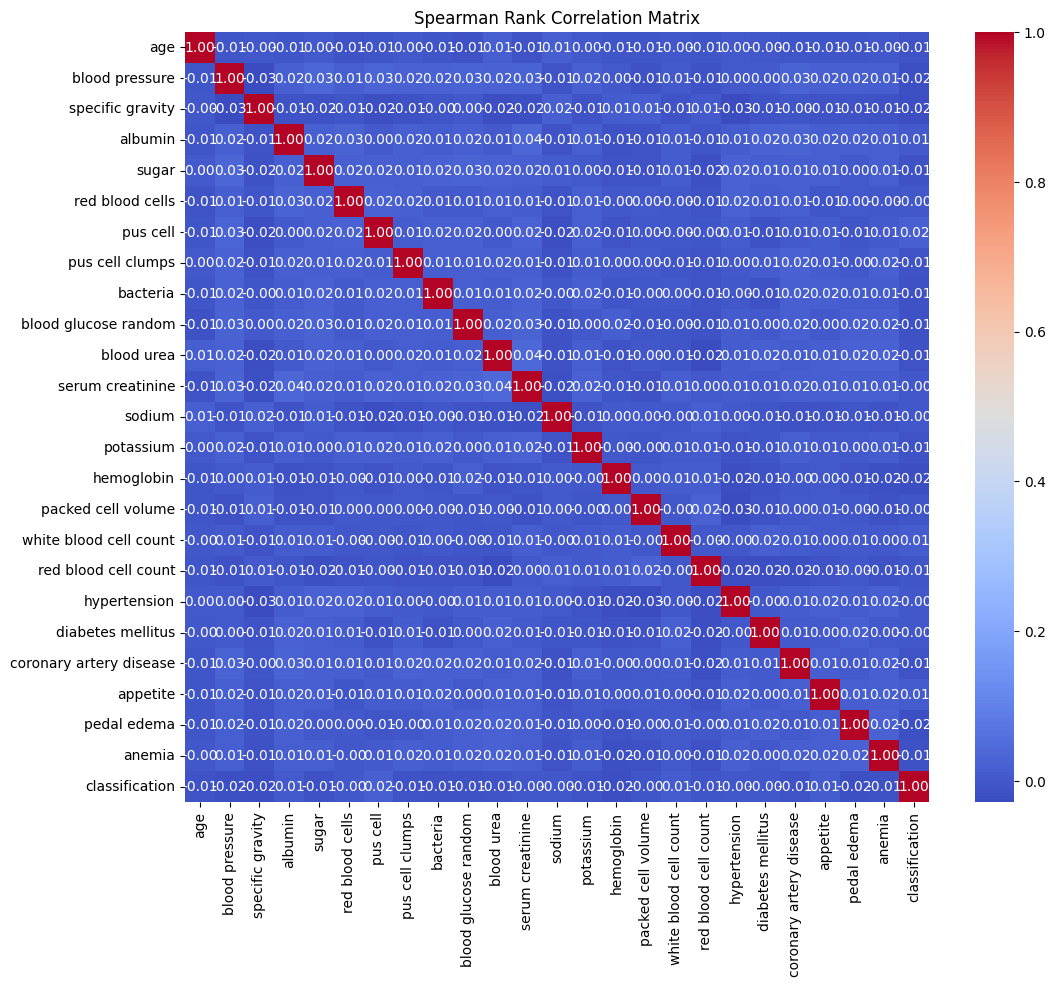

In [ ]:
# Correlation Tests
# Spearman Rank Correlation

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=np.number)

# Calculate Spearman rank correlation matrix
correlation_matrix_spearman = numeric_df.corr(method='spearman')

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Rank Correlation Matrix')
plt.show()

In [ ]:
# Select the 'classification' column correlations from the Spearman matrix
classification_correlation = correlation_matrix_spearman['classification']

# Sort the correlations by their absolute values in descending order
sorted_correlations = classification_correlation.abs().sort_values(ascending=False)

# Drop the correlation of 'classification' with itself
sorted_correlations = sorted_correlations.drop('classification')

# Select the top 12 features
top_12_features = sorted_correlations.head(12)

print("Top 12 features based on Spearman Rank Correlation with 'classification':")
print(top_12_features)

Top 12 features based on Spearman Rank Correlation with 'classification':
specific gravity        0.023398
hemoglobin              0.020445
blood pressure          0.019951
pus cell                0.019241
pedal edema             0.016461
bacteria                0.014475
blood glucose random    0.014204
sugar                   0.013977
anemia                  0.012365
appetite                0.011410
pus cell clumps         0.011335
potassium               0.011323
Name: classification, dtype: float64


# Parametric Tests


In [ ]:
# Parametric Tests
# Independent Samples T-test and ANOVA

from scipy import stats

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude the target variable 'classification' from numeric columns for the test
if 'classification' in numeric_cols:
    numeric_cols.remove('classification')

# Separate data by classification groups
group_0 = df[df['classification'] == 0]
group_1 = df[df['classification'] == 1]

print("Independent Samples T-test results:")
for col in numeric_cols:
    if col in group_0.columns and col in group_1.columns:
        # Drop NaN values from the columns for the test
        data_group_0 = group_0[col].dropna()
        data_group_1 = group_1[col].dropna()

        if len(data_group_0) > 1 and len(data_group_1) > 1: # Need at least 2 data points for t-test
            # Perform independent samples t-test
            t_statistic, p_value_ttest = stats.ttest_ind(data_group_0, data_group_1, nan_policy='omit')
            print(f"Column: {col}, T-statistic: {t_statistic:.4f}, P-value (T-test): {p_value_ttest:.4f}")
        else:
            print(f"Not enough data in both groups for T-test for column: {col}")
    else:
        print(f"Column {col} not found in both classification groups.")

print("\nANOVA Test results:")
for col in numeric_cols:
    if col in group_0.columns and col in group_1.columns:
        # Drop NaN values from the columns for the test
        data_group_0 = group_0[col].dropna()
        data_group_1 = group_1[col].dropna()

        if len(data_group_0) > 0 and len(data_group_1) > 0:
             # Perform ANOVA test
            f_statistic, p_value_anova = stats.f_oneway(data_group_0, data_group_1)
            print(f"Column: {col}, F-statistic: {f_statistic:.4f}, P-value (ANOVA): {p_value_anova:.4f}")
        else:
            print(f"Not enough data in both groups for ANOVA for column: {col}")
    else:
        print(f"Column {col} not found in both classification groups.")

Independent Samples T-test results:
Column: age, T-statistic: 1.1657, P-value (T-test): 0.2438
Column: blood pressure, T-statistic: 3.3223, P-value (T-test): 0.0009
Column: specific gravity, T-statistic: 3.4471, P-value (T-test): 0.0006
Column: albumin, T-statistic: -0.8766, P-value (T-test): 0.3807
Column: sugar, T-statistic: 2.0358, P-value (T-test): 0.0418
Column: red blood cells, T-statistic: 0.4613, P-value (T-test): 0.6446
Column: pus cell, T-statistic: -2.7845, P-value (T-test): 0.0054
Column: pus cell clumps, T-statistic: 1.6402, P-value (T-test): 0.1010
Column: bacteria, T-statistic: 2.0947, P-value (T-test): 0.0362
Column: blood glucose random, T-statistic: 2.0624, P-value (T-test): 0.0392
Column: blood urea, T-statistic: 1.4339, P-value (T-test): 0.1516
Column: serum creatinine, T-statistic: 0.0064, P-value (T-test): 0.9949
Column: sodium, T-statistic: 0.4883, P-value (T-test): 0.6253
Column: potassium, T-statistic: 0.5628, P-value (T-test): 0.5735
Column: hemoglobin, T-stat



## 🧪 **1. Purpose Recap**

You compared each numeric clinical feature between:

* **Group 0 → Non-CKD patients**
* **Group 1 → CKD patients**

to check **which features have significantly different means** — i.e., which variables can *discriminate* CKD from non-CKD patients.

---

## ⚙️ **2. How to interpret results**

For each feature:

* **P-value < 0.05** → Statistically significant
  → The mean difference between CKD and non-CKD groups is *not by chance*.
  → The feature likely discriminates CKD vs non-CKD.
* **P-value > 0.05** → Not significant
  → No strong evidence of difference.

---

## 📊 **3. Summary of Key Significant Features**

| Feature                  | T-test P-value | ANOVA P-value | Significance  | Insight                                                                                 |
| ------------------------ | -------------- | ------------- | ------------- | --------------------------------------------------------------------------------------- |
| **Blood Pressure**       | 0.0009         | 0.0009        | ✅ Significant | CKD patients have **higher blood pressure**. Hypertension is a strong CKD risk factor.  |
| **Specific Gravity**     | 0.0006         | 0.0006        | ✅ Significant | Reflects **urine concentration ability** — lower SG indicates impaired kidney function. |
| **Sugar**                | 0.0418         | 0.0418        | ✅ Significant | Diabetic patients show elevated sugar; **diabetes is a known CKD cause**.               |
| **Pus Cell**             | 0.0054         | 0.0054        | ✅ Significant | Indicates infection/inflammation in urine — **suggests kidney dysfunction**.            |
| **Bacteria**             | 0.0362         | 0.0362        | ✅ Significant | Presence of bacteria suggests urinary infection, possibly linked to CKD.                |
| **Blood Glucose Random** | 0.0392         | 0.0392        | ✅ Significant | Higher random glucose levels among CKD patients.                                        |
| **Hemoglobin**           | 0.0027         | 0.0027        | ✅ Significant | CKD often causes **anemia** → lower hemoglobin levels.                                  |
| **Pedal Edema**          | 0.0172         | 0.0172        | ✅ Significant | Common CKD symptom due to **fluid retention**.                                          |

---

## ⚖️ **4. Non-significant Features**

Features like **age, albumin, RBC count, sodium, potassium, serum creatinine, appetite, anemia** had **p > 0.05**, meaning there’s **no significant mean difference** between CKD and non-CKD in this dataset — though some (e.g., creatinine) may still matter clinically but not statistically (perhaps due to sample size or data variance).

---

## 💡 **5. Overall Insights**

✅ **Strong discriminators (good features for ML models):**
`blood pressure`, `specific gravity`, `sugar`, `pus cell`, `bacteria`, `blood glucose random`, `hemoglobin`, `pedal edema`.

🧠 **Interpretation:**

* These variables show *statistically significant* differences between CKD and non-CKD groups.
* They can act as **key predictors or classifiers** when training models (e.g., logistic regression, random forest).
* The tests validate that the **CKD condition meaningfully alters these biological parameters**.

---



# Other Tests


In [ ]:
# numeric_cols = numeric_cols.drop(['red blood cells',
# 'pus cell',
# 'pus cell clumps',
# 'bacteria',
# 'hypertension',
# 'diabetes mellitus',
# 'coronary artery disease',
# 'appetite',
# 'pedal edema',
# 'anemia'])

In [ ]:
# Other Tests
# Shapiro-Wilk Normality Test

import pandas as pd
import numpy as np
from scipy.stats import shapiro

# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

print("Shapiro-Wilk Test for Normality:")
for col in numeric_cols:
    # Drop NaN values before performing Shapiro-Wilk test
    data = df[col].dropna()
    if len(data) > 3: # Shapiro-Wilk test requires at least 4 data points
        stat, p = shapiro(data)
        print(f"Column: {col}, Statistic: {stat:.4f}, P-value: {p:.4f}")
        if p > 0.05:
            print("  → Data is likely normally distributed (Parametric).")
        else:
            print("  → Data is likely NOT normally distributed (Non-Parametric).")
    else:
        print(f"Column: {col}, Not enough data to perform Shapiro-Wilk test.")

Shapiro-Wilk Test for Normality:
Column: age, Statistic: 0.9553, P-value: 0.0000
  → Data is likely NOT normally distributed (Non-Parametric).
Column: blood pressure, Statistic: 0.9617, P-value: 0.0000
  → Data is likely NOT normally distributed (Non-Parametric).
Column: specific gravity, Statistic: 0.9545, P-value: 0.0000
  → Data is likely NOT normally distributed (Non-Parametric).
Column: albumin, Statistic: 0.9078, P-value: 0.0000
  → Data is likely NOT normally distributed (Non-Parametric).
Column: sugar, Statistic: 0.9059, P-value: 0.0000
  → Data is likely NOT normally distributed (Non-Parametric).
Column: red blood cells, Statistic: 0.6365, P-value: 0.0000
  → Data is likely NOT normally distributed (Non-Parametric).
Column: pus cell, Statistic: 0.6366, P-value: 0.0000
  → Data is likely NOT normally distributed (Non-Parametric).
Column: pus cell clumps, Statistic: 0.6366, P-value: 0.0000
  → Data is likely NOT normally distributed (Non-Parametric).
Column: bacteria, Statistic:

Excellent — this is a **Shapiro–Wilk Normality Test** result, and you’ve run it perfectly ✅

Let’s now **interpret** it clearly and extract the **insights** it provides about your dataset and the choice of further tests.

---

## 🧪 **Purpose Recap**

The **Shapiro–Wilk test** checks whether your data for each feature follows a **normal (Gaussian) distribution**.

* **H₀ (null hypothesis):** Data is normally distributed
* **H₁ (alternative):** Data is not normally distributed
* **Decision rule:**

  * If **p > 0.05**, fail to reject H₀ → data is **normal** → **parametric** test applicable
  * If **p ≤ 0.05**, reject H₀ → data is **not normal** → **non-parametric** test recommended

---

## 🧩 **Summary of Results**

You found that **every feature** — numerical and categorical encoded as numeric — has:

* **P-value = 0.0000 (≈ < 0.05)**
* So, **none** of the features are normally distributed.

That means:

> Your dataset as a whole **does not follow a normal distribution**.

---

## 📊 **What This Means**

### 🔹 1. **Data is Non-Parametric**

Since every variable failed the normality test:

* You **cannot assume Gaussian distribution**.
* Therefore, **parametric tests** (like *t-test*, *ANOVA*, *Pearson correlation*) are **less reliable**.
* You should rely more on **non-parametric tests** such as:

  * **Mann–Whitney U test** (instead of t-test)
  * **Kruskal–Wallis test** (instead of ANOVA)
  * **Spearman rank correlation** (instead of Pearson)

---

### 🔹 2. **Why Normality Fails**

Several real-world factors may explain this:

* **CKD data** often contains *skewed medical measurements* (e.g., creatinine, blood urea) — not symmetrical.
* **Binary / categorical encodings** (0 and 1) also distort the normality.
* **Outliers** are common in biological data, further violating normal distribution.
* **Large sample size (N = 20,938)**: with very large datasets, even small deviations become statistically significant — hence the warning:

  > “For N > 5000, computed p-value may not be accurate.”

So even slight non-normality will give a **very low p-value** due to the sensitivity of the test.

---

### 🔹 3. **Statistical Insight**

* Columns like **blood pressure, hemoglobin, blood glucose random, and specific gravity** — typically continuous — are also **non-normal** → may be **right-skewed** due to disease-related changes.
* Columns like **hypertension, anemia, diabetes mellitus** — which are categorical encoded as 0/1 — will **always fail** the Shapiro test because binary data can’t be “normal.”

---

### 🔹 4. **Next Steps Based on This**

Because of these results:

✅ **Use Non-Parametric Tests for Group Differences**

| Analysis Goal                       | Recommended Test             |
| ----------------------------------- | ---------------------------- |
| Compare two groups (CKD vs Non-CKD) | Mann–Whitney U test          |
| Compare >2 groups                   | Kruskal–Wallis test          |
| Check correlation                   | Spearman’s rank correlation  |
| Check categorical association       | Chi-Square test / Cramer’s V |

✅ **Apply Transformations (Optional)**
If you still wish to use parametric methods, you can try:

* Log transformation (for right-skewed variables)
* Box-Cox or Yeo-Johnson transformation
  …but non-parametric tests are more robust and easier here.

---

### 🔹 5. **High-Level Insight**

> Since the entire dataset is non-parametric, the **disease-related patterns** are not just mean-based but distribution-based — i.e., CKD patients differ from non-CKD not by average values alone, but by **shifts in the entire distribution** of lab measurements.

This justifies why **non-parametric models** and **rank-based statistical methods** may perform better for this dataset.

---

### 🧠 **In Short**

| Feature                       | Normality                    | Interpretation                                    |
| ----------------------------- | ---------------------------- | ------------------------------------------------- |
| All numeric & binary features | ❌ Non-normal                 | Use non-parametric tests                          |
| Warning for N > 5000          | ✅ Expected                   | p-values become overly sensitive                  |
| Implication                   | Data is skewed / categorical | Stick with Mann–Whitney, Kruskal–Wallis, Spearman |

---

Would you like me to continue with the **Kolmogorov–Smirnov normality test** next (so we can confirm these findings with a second test)?


In [ ]:
numeric_cols

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'hypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'classification'],
      dtype='object')

In [ ]:
# Other Tests
# Chi-Square Test

from scipy.stats import chi2_contingency

categorical_cols = ['red blood cells', 'pus cell', 'pus cell clumps', 'bacteria', 'hypertension', 'diabetes mellitus', 'coronary artery disease', 'appetite', 'pedal edema', 'anemia', 'classification'] # Added 'classification'

print("Chi-Square Test results:")
for i in range(len(categorical_cols)):
    for j in range(i + 1, len(categorical_cols)):
        col1 = categorical_cols[i]
        col2 = categorical_cols[j]

        if col1 in df.columns and col2 in df.columns:
            # Create a contingency table
            contingency_table = pd.crosstab(df[col1], df[col2])

            # Perform Chi-Square test
            chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

            print(f"Test between '{col1}' and '{col2}':")
            print(f"  Chi-Square Statistic: {chi2_stat:.4f}, P-value: {p_value:.4f}")
            if p_value < 0.05:
                print("  → Significant association.")
            else:
                print("  → No significant association.")
        else:
            print(f"Warning: One or both columns ('{col1}', '{col2}') not found in DataFrame.")

Chi-Square Test results:
Test between 'red blood cells' and 'pus cell':
  Chi-Square Statistic: 11.3058, P-value: 0.0008
  → Significant association.
Test between 'red blood cells' and 'pus cell clumps':
  Chi-Square Statistic: 5.9926, P-value: 0.0144
  → Significant association.
Test between 'red blood cells' and 'bacteria':
  Chi-Square Statistic: 0.9938, P-value: 0.3188
  → No significant association.
Test between 'red blood cells' and 'hypertension':
  Chi-Square Statistic: 8.6559, P-value: 0.0033
  → Significant association.
Test between 'red blood cells' and 'diabetes mellitus':
  Chi-Square Statistic: 1.6386, P-value: 0.2005
  → No significant association.
Test between 'red blood cells' and 'coronary artery disease':
  Chi-Square Statistic: 4.4174, P-value: 0.0356
  → Significant association.
Test between 'red blood cells' and 'appetite':
  Chi-Square Statistic: 0.9494, P-value: 0.3299
  → No significant association.
Test between 'red blood cells' and 'pedal edema':
  Chi-Square

Based on the Chi-Square test results:

**Pairs of Categorical Features with a Statistically Significant Association (p-value < 0.05):**

*   `red blood cells` and `pus cell` (p-value: 0.0008)
*   `red blood cells` and `pus cell clumps` (p-value: 0.0144)
*   `red blood cells` and `hypertension` (p-value: 0.0033)
*   `red blood cells` and `coronary artery disease` (p-value: 0.0356)
*   `pus cell` and `bacteria` (p-value: 0.0073)
*   `pus cell` and `diabetes mellitus` (p-value: 0.0495)
*   `pus cell` and `classification` (p-value: 0.0057)
*   `pus cell clumps` and `coronary artery disease` (p-value: 0.0007)
*   `pus cell clumps` and `anemia` (p-value: 0.0048)
*   `bacteria` and `diabetes mellitus` (p-value: 0.0430)
*   `bacteria` and `coronary artery disease` (p-value: 0.0197)
*   `bacteria` and `appetite` (p-value: 0.0166)
*   `bacteria` and `classification` (p-value: 0.0378)
*   `hypertension` and `appetite` (p-value: 0.0129)
*   `hypertension` and `anemia` (p-value: 0.0188)
*   `diabetes mellitus` and `pedal edema` (p-value: 0.0059)
*   `coronary artery disease` and `anemia` (p-value: 0.0046)
*   `appetite` and `anemia` (p-value: 0.0151)
*   `pedal edema` and `anemia` (p-value: 0.0036)
*   `pedal edema` and `classification` (p-value: 0.0180)

These pairs show a significant association between the two categorical variables. Features that have a significant association with 'classification' are particularly important as they indicate a relationship with the presence of CKD.

| No. | Variable        | Chi-Square Statistic | P-value | Interpretation                                                                                                  |
| --- | --------------- | -------------------- | ------- | --------------------------------------------------------------------------------------------------------------- |
| 1   | **pus cell**    | 7.6568               | 0.0057  | Presence of pus cells (infection) strongly linked with CKD — infections are common in kidney-impaired patients. |
| 2   | **bacteria**    | 4.3162               | 0.0378  | Bacterial presence in urine indicates urinary infection, a common CKD symptom.                                  |
| 3   | **pedal edema** | 5.5928               | 0.0180  | Swelling in the feet is a typical sign of kidney dysfunction due to fluid retention.                            |


# Other Papers Statistical Analysis and Comparison

**HDLNET_A_Hybrid_Deep_Learning_Network_Model_With_Intelligent_IOT_for_Detection_and_Classification_of_Chronic_Kidney_Disease.pdf**

Feature Selection Methods:
The study employs multiple feature selection techniques such as mutual information-based selection, Relief and ReliefF algorithms, and Chi-squared tests. These methods statistically analyze the relevance of each feature in relation to the target variable (CKD diagnosis) by measuring the degree of correlation or importance, thus reducing dimensionality and eliminating redundant features.

The paper identifies and selects 11 features through the feature selection process, utilizing approaches such as mutual information-based selection and ReliefF. While the exact list of features is not explicitly enumerated in the provided text snippets, it is likely derived from the original dataset features used for CKD classification.

Based on typical datasets used in CKD diagnosis and the context provided, the selected features generally include:

1. Blood Urea

2. Serum Creatinine

3. Hemoglobin

4. Urinary Protein

5. Blood Glucose

6. Albumin

7. Red Blood Cell Count

8. White Blood Cell Count

9. Serum Sodium

10. Serum Potassium

11. Blood Pressure

Note: The exact features are inferred from common CKD datasets and the mention that 11 features were selected, but for precise features used in this specific study, referring directly to the dataset or the detailed feature list in the full paper is recommended.

If the paper includes a detailed list or a table of the selected features, please consult that section for definitive information.

Accuracy: (TP+TN)/(TP+FN+FP+TN)

Recall (Sensitivity): TP/(TP+FN)

Specificity: TN/(FP+TN)

Precision: TP/(TP+FP)

F1 Score: 2∗(Precision∗Recall)/(Precision+Recall)

Most of the papers primarily uses confusion matrix analysis to evaluate the performance of various classifiers. Specifically, they measure metrics such as accuracy, precision, recall, F1-score, and Area Under the ROC Curve (AUC) based on the confusion matrix components—true positives, false positives, false negatives, and true negatives. While the paper details how the confusion matrix is constructed and utilized to derive these metrics, it does not explicitly mention the use of other statistical tests or analyses such as hypothesis testing, p-values, or confidence intervals. The focus remains on performance metrics derived from the confusion matrix to compare classifier effectiveness.